## Importing the required libraries

In [1]:
# library required for structured Python code

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Library required to suppress any warning messages
import warnings

warnings.filterwarnings("ignore")

# Libraries required for data analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)  # adds background to the graph

# Remove the limit for number of displayed columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

<IPython.core.display.Javascript object>

In [3]:
# Libraries required for model building and performance evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Libraries required to build classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from xgboost import XGBClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Libraries required for data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Libraries used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries required to create pipelines and personalize them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

<IPython.core.display.Javascript object>

## Load Dataset

In [4]:
# reading the dataset
credit_card_user = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [5]:
data = credit_card_user.copy()  # creating a copy of the dataset

<IPython.core.display.Javascript object>

## Data Structure Analysis

In [6]:
# viewing top 10 observations from the dataset
data.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6             NaN        Married         $120K +          Gold   
7     High School            NaN     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   
5              36                         3                       1   
6              46                         6                       1   
7              27                         2                       2   
8              36                         5                       2   
9              36                         6                       3   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   
5                      2      4010.000                 1247         2763.000   
6                      3     34516.000                 2264        32252.000   
7                      2     29081.000                 1396        27685.000   
8                      0     22352.000                 2517        19835.000   
9                      3     11656.000                 1677         9979.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   
6                 1.975             1330              31                0.722   
7                 2.204             1538              36                0.714   
8                 3.355             1350              24                1.182   

<IPython.core.display.Javascript object>

- CLIENTNUM could be client's unique identification number 
- The target variable 'Attrition_Flag' contains string values
- Missing values in Education_Level and Marital_Status columns
- Income_Category requires data processing to be done
- Exploratory analysis must be performed to check for any other issues in the dataset

In [7]:
# checking the shape of the dataset
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

- There are 10,127 rows and 21 columns in the dataset

In [8]:
# viewing the overall information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

- Missing values in Education_Level and Marital_Status columns
- 5 float, 10 int and 6 object type columns
- memory used is 1.6+ MB

In [9]:
# checking for duplicated values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicated values in the dataset

In [10]:
# checking for the count of missing values
data.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

- There are a total of 1519 missing values in Education_Level and 749 missing values in Marital_Status columns

In [11]:
# checking the number of unique values in each column
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

<IPython.core.display.Javascript object>

- CLIENTNUM is the unique identification number of a client
- Large number of unique values in the numerical columns


In [12]:
# making a list of categorical columns
cols = data[
    [
        "Attrition_Flag",
        "Gender",
        "Dependent_count",
        "Education_Level",
        "Marital_Status",
        "Income_Category",
        "Card_Category",
        "Total_Relationship_Count",
        "Months_Inactive_12_mon",
        "Contacts_Count_12_mon",
    ]
]

<IPython.core.display.Javascript object>

In [13]:
# Printing the unique values in each column

for i in cols:
    print("\nUnique values in", i, "are :")
    print(data[i].value_counts())
    print("\n")
    print("-" * 40)


Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


----------------------------------------

Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64


----------------------------------------

Unique values in Dependent_count are :
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64


----------------------------------------

Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


----------------------------------------

Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64


----------------------------------------

Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60

<IPython.core.display.Javascript object>

- The target column has imbalanced classes
- Female customers are more in number
- Graduate customers are more in number comparatively
- More number of customers are married followed by single customers and a handful of divorced customers
- The average annual income of large number of customers in under $40K
- There are 4 different types of cards ; with large number of customers holding the 'Blue' card, maybe it is the standard/basic card issued by the bank

In [14]:
# checking the statistical summary of the dataset
data.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

<IPython.core.display.Javascript object>

- CLIENTNUM is all uniques values i.e. it can be set as the index number
- The statistical summary shows exponential values i.e. the dataset has extreme values. Must check with EDA
- No missing values in the numerical columns

In [15]:
data.describe(include="object").T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

<IPython.core.display.Javascript object>

- Missing values in Education_Level and Marital_Status
- Existing Customer has the highest frequency i.e. the target variable has an imbalance in the classes
- Graduates and Married customers are high in number
- Customers with annual income less than $40K outnumber customers with other income ranges
- 'Blue' card holders are high in number i.e. 'Blue' card could be the basic credit card issued by the bank

# Exploratory Data Analysis

## Univariate Analysis

In [16]:
# Creating an array of color codes to use in this project
colors = ["#4178FB", "#4DE0FA", "#7DFFC6"]

# Setting custom color palette
sns.set_palette(sns.color_palette(colors))

<IPython.core.display.Javascript object>

In [17]:
# Defining a method to print the percentage of data points in the plot
def perc_on_bar(plot, feature):
    """
    plot
    feature : categorical feature
    the function won't work if a column is passed in hue parameter
    
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.06  # width of the plot
        y = p.get_y() + p.get_height()  # height of the plot
        ax.annotate(
            percentage,
            (x, y),
            # ha="center",
            # va="center",
            size=12,
            # xytext=(0, 3),
            # textcoords="offset points",
        )  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [18]:
# Defining a method to plot histogram and boxplot combined in a single plot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    feature : dataframe column
    figsize : size of figure (default (12,7))
    kde : whether to show the density curve (default False)
    bins : number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### 1. Attrition Flag

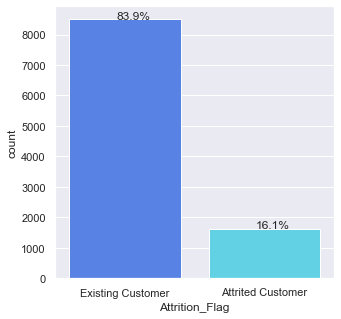

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["Attrition_Flag"])
perc_on_bar(ax, data["Attrition_Flag"])

- 83.9% of the customers are existing customers whereas 16.1% of them have attrited i.e. this is an imbalanced classification problem

### 2. Customer Age

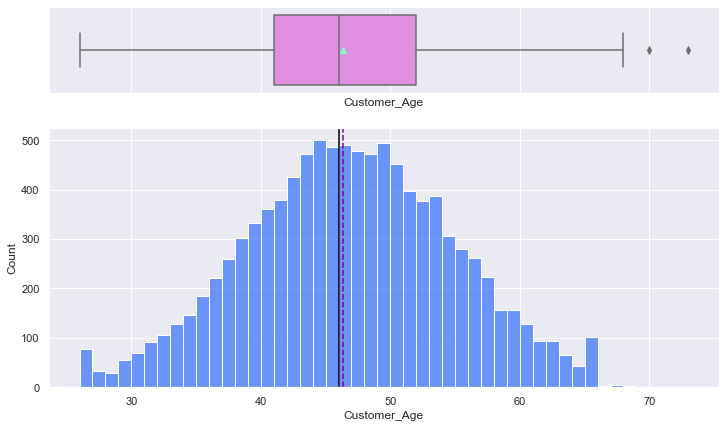

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "Customer_Age")

- Customer Age is normally distributed
- Outliers spotted around 68 years of age

### 3. Gender

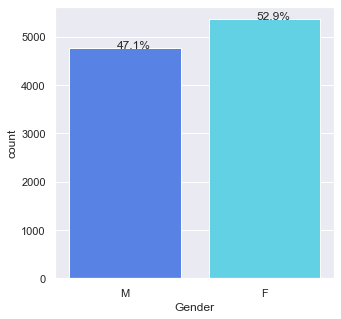

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["Gender"])
perc_on_bar(ax, data["Gender"])

- The bank has 52.9% of Female customers as opposed to 47.1% of Male customers

### 4. Dependent Count

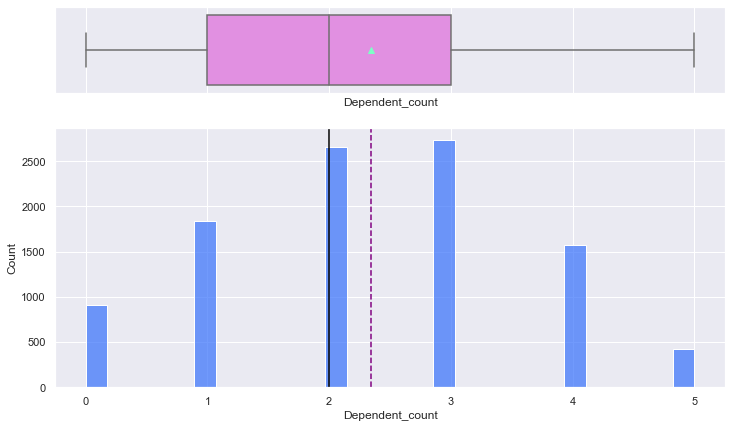

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "Dependent_count")

- Highest number of cutomers have either 3 or 2 dependents
- The distribution of data implies Dependent_count can be treated as category

### 5. Education Level

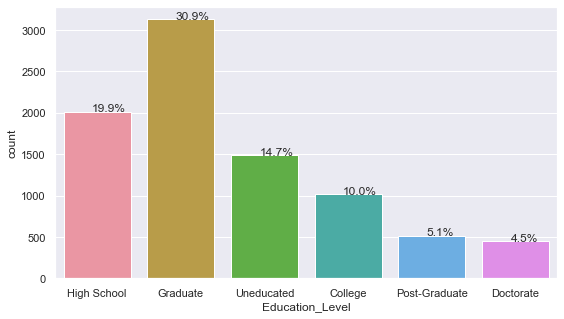

<IPython.core.display.Javascript object>

In [23]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data["Education_Level"])
perc_on_bar(ax, data["Education_Level"])

- As seen from the data summary, Graduate customers are large in number
- Followed by High School-level eduacted and then Uneducated customers
- Customers with highest level of education are at the bottom two

### 6. Marital Status

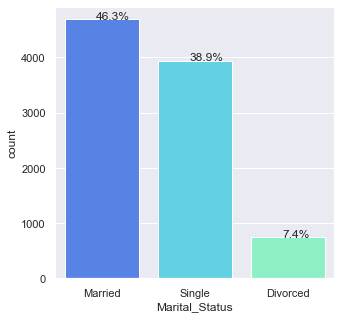

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["Marital_Status"])
perc_on_bar(ax, data["Marital_Status"])

- 46.3% of customers are Married, 38.9% of customers are Single and 7.4% are Divorced

### 7. Income Category

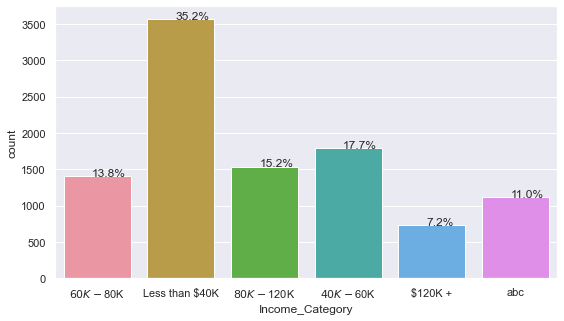

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data["Income_Category"])
perc_on_bar(ax, data["Income_Category"])

- The annual income of 35.2% of customers is less than $40K 

- There is an unknown category abc with 11% of customers
- There are only 7.2% of customers with an annual income above $120K

### 8. Card Category

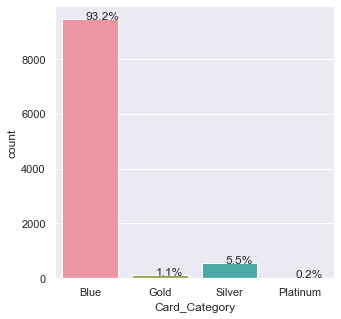

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data["Card_Category"])
perc_on_bar(ax, data["Card_Category"])

- 93.2% of cutomers hold the 'Blue' card. This may be because the Blue card is the basic card issued by the bank
- 5.5% of customers hold the 'Silver' card
- Only 1.1% of customers hold the 'Gold' card and 0.2% of customers hold the 'Platinum' card

### 9. Months_on_book

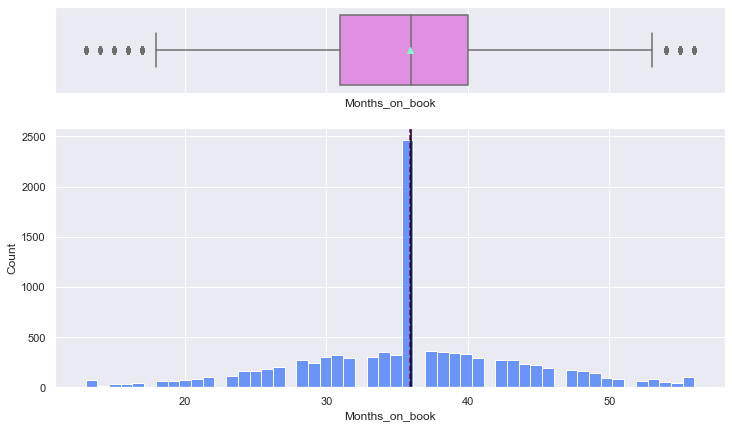

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data, "Months_on_book")

- Outliers under 15 months and above 50 months
- Maximum number of customers have been with the bank for about 36 months

### 10. Total Relationship Count

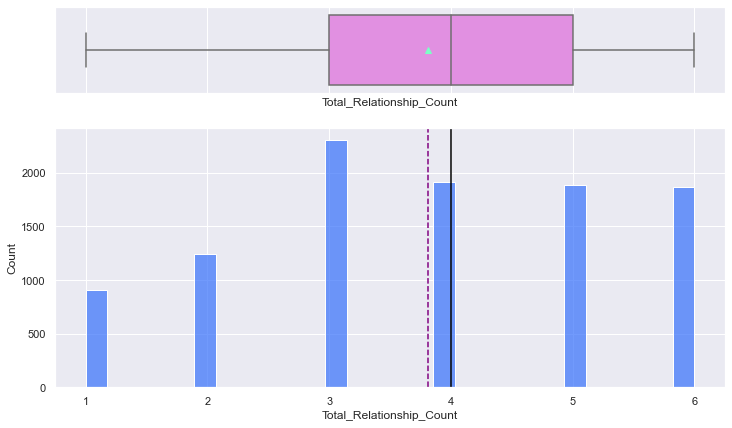

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "Total_Relationship_Count")

- Total number of products held by the customer ranges from 1 to 6
- Large number of customers hold 3 products
- The distrobution of data implies Total_Relationship_Count can be treated as category

### 11. Months_Inactive_12_mon

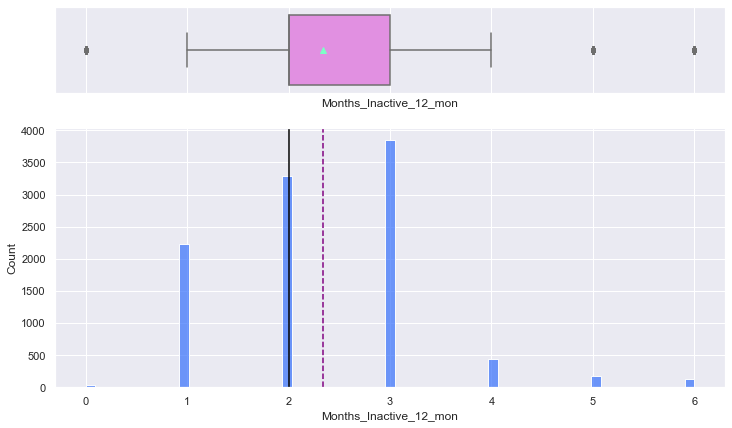

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(data, "Months_Inactive_12_mon")

- In the past 12 months, sustomers have been inactive for a maximum of 3 months, followed by 2 months and 1 month
- Outliers spotted under 1 month and above 4 months
- The distribution of data implies, this column can be treated as a category

### 12. Contacts_Count_12_mon

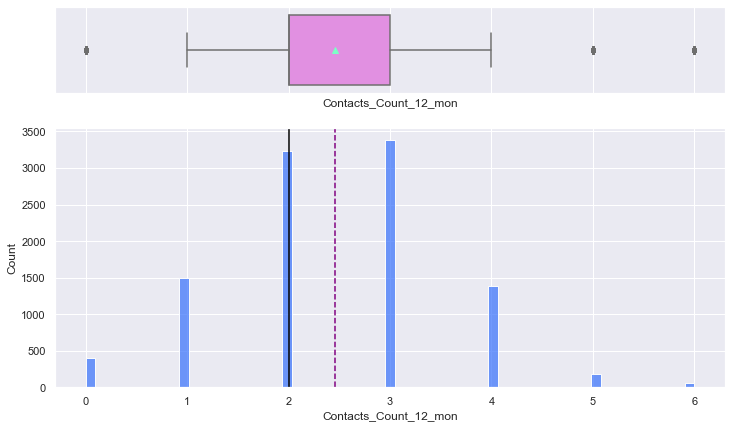

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data, "Contacts_Count_12_mon")

- Maximum number of contacts between a customer and the bank in the last 12 months is 3, followed by 2 and 1
- Outliers under 1 (maybe no contact at all) and above 4

### 13. Credit Limit

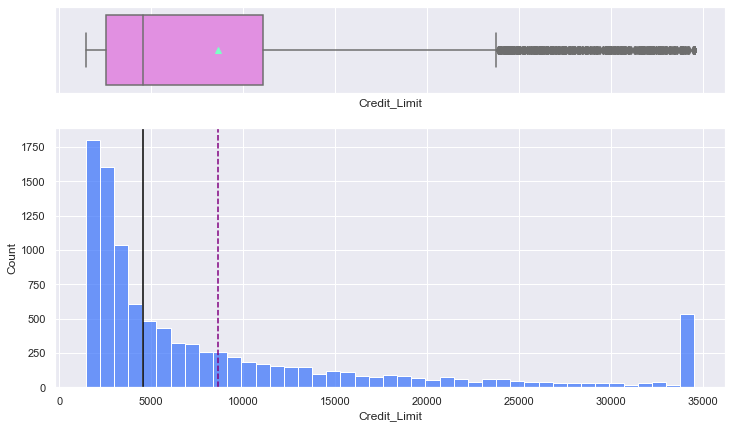

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data, "Credit_Limit")

- The distribution shows a highly skewed data for Credit Limit
- Outliers above 25K with large number of outliers concentrated around 35K
- Maybe Gold/Platinum cards have higher credit limits than the rest with the Blue card having the lowest credit limit

### 14. Total Revolving Balance

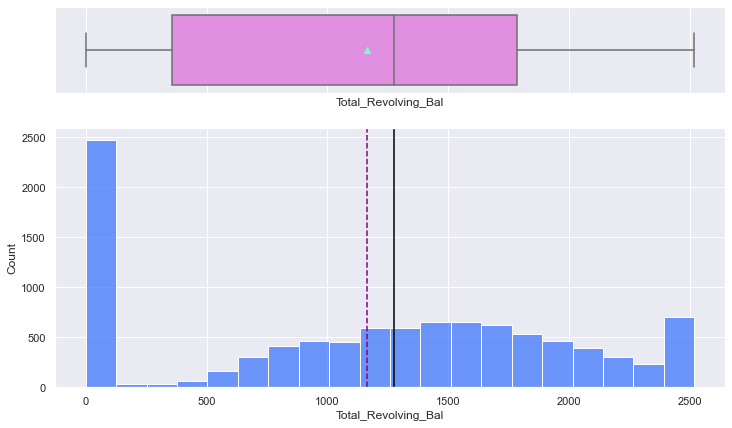

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(data, "Total_Revolving_Bal")

- Most customers do not have a revolving balance
- Followed by customers with $2.5K revolving balance
- The distribution suggests, Total_Revolving_Bal can be treated as Yes/No for model building. Need to do further analysis to decide the same

### 15. Average Open To Buy

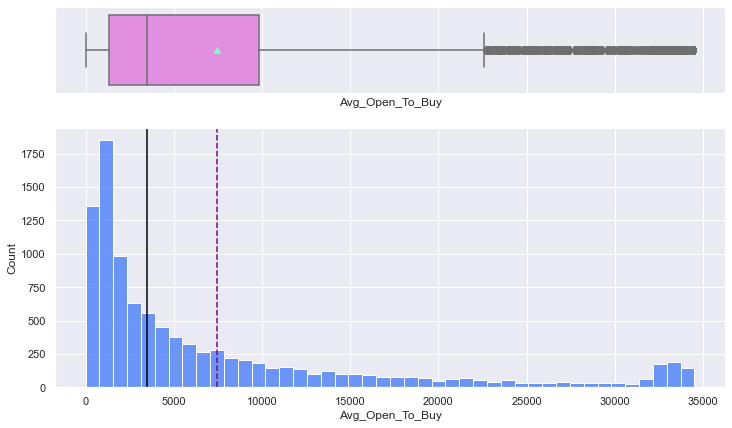

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(data, "Avg_Open_To_Buy")

- The distribution is right skewed
- Maximum number of customers have $1K or less balance on their credit card

- Outliers spotted above $22K. Let's explore it further.

In [34]:
data[data["Avg_Open_To_Buy"] > 25000].head(15)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6    810347208  Existing Customer            51      M                4   
7    818906208  Existing Customer            32      M                0   
16   709967358  Existing Customer            48      M                4   
40   827111283  Existing Customer            45      M                3   
45   712661433  Existing Customer            49      M                4   
61   712030833  Attrited Customer            48      M                2   
65   788979258  Existing Customer            51      M                4   
70   715971108  Existing Customer            51      M                4   
79   710790258  Existing Customer            47      M                2   
81   715156383  Existing Customer            44      M                1   
84   794543958  Existing Customer            53      M                1   
91   714070758  Existing Customer            49      M                4   
101  713843283  Existing Customer            41      F                3   
106  779509983  Existing Customer            53      M                2   
109  708476808  Existing Customer            54      M                4   

    Education_Level Marital_Status Income_Category Card_Category  \
6               NaN        Married         $120K +          Gold   
7       High School            NaN     $60K - $80K        Silver   
16    Post-Graduate         Single    $80K - $120K          Blue   
40         Graduate         Single    $80K - $120K          Blue   
45       Uneducated         Single    $80K - $120K          Blue   
61         Graduate        Married     $60K - $80K        Silver   
65       Uneducated         Single    $80K - $120K        Silver   
70         Graduate         Single         $120K +          Blue   
79         Graduate        Married    $80K - $120K          Blue   
81              NaN            NaN         $120K +          Blue   
84         Graduate       Divorced    $80K - $120K          Blue   
91      High School         Single    $80K - $120K          Blue   
101             NaN        Married             abc        Silver   
106   Post-Graduate         Single         $120K +          Blue   
109             NaN       Divorced         $120K +          Blue   

     Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6                46                         6                       1   
7                27                         2                       2   
16               36                         6                       2   
40               41                         2                       2   
45               30                         3                       2   
61               35                         2                       4   
65               38                         4                       1   
70               42                         3                       2   
79               38                         6                       3   
81               36                         6                       2   
84               35                         5                       4   
91               38                         4                       3   
101              34                         5                       3   
106              36                         6                       1   
109              36                         6                       3   

     Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6                        3     34516.000                 2264   
7                        2     29081.000                 1396   
16                       3     30367.000                 2362   
40                       2     32426.000                  578   
45                       3     34516.000                    0   
61                       4     34516.000                    0   
65                       4     34516.000                 1515   
70                       3

<IPython.core.display.Javascript object>

In [35]:
data[data["Avg_Open_To_Buy"] > 25000].tail(15)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10031  717355533  Existing Customer            56      M                3   
10036  709831983  Existing Customer            57      M                2   
10038  716850558  Existing Customer            48      M                4   
10051  770038983  Attrited Customer            37      M                4   
10065  709865883  Attrited Customer            38      M                2   
10070  747551658  Existing Customer            47      M                3   
10079  715090008  Existing Customer            45      M                4   
10086  824150733  Existing Customer            43      M                2   
10088  709188108  Existing Customer            45      M                2   
10095  789023508  Existing Customer            46      M                3   
10098  716644008  Attrited Customer            55      M                3   
10100  719848008  Existing Customer            39      M                2   
10104  715474083  Existing Customer            51      M                3   
10110  718225683  Existing Customer            56      M                1   
10112  708564858  Attrited Customer            33      M                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10031        Graduate         Single         $120K +          Blue   
10036      Uneducated         Single         $120K +          Blue   
10038        Graduate            NaN     $60K - $80K          Gold   
10051     High School         Single     $60K - $80K        Silver   
10065     High School       Divorced     $60K - $80K        Silver   
10070     High School            NaN    $80K - $120K        Silver   
10079        Graduate         Single     $60K - $80K        Silver   
10086     High School        Married    $80K - $120K        Silver   
10088        Graduate         Single     $60K - $80K        Silver   
10095             NaN        Married    $80K - $120K          Blue   
10098        Graduate         Single         $120K +        Silver   
10100        Graduate            NaN     $60K - $80K        Silver   
10104        Graduate         Single     $60K - $80K        Silver   
10110        Graduate         Single    $80K - $120K        Silver   
10112         College        Married         $120K +          Gold   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10031              44                         3                       1   
10036              46                         3                       2   
10038              32                         5                       1   
10051              31                         1                       3   
10065              25                         1                       2   
10070              40                         5                       3   
10079              36                         2                       3   
10086              39                         3                       1   
10088              33                         4                       2   
10095              33                         4                       1   
10098              36                         4                       3   
10100              36                         4                       2   
10104              36                         3                       2   
10110              49                         5                       2   
10112              20                         2                       1   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10031                      2     34516.000                 1307   
10036                      3     34516.000                 1244   
10038                      3     34516.000                 1285   
10051                      3     28831.000                 2517   
10065                      3     26794.000                  821   
10070                      2     34516.000        

<IPython.core.display.Javascript object>

- The records with outliers above 22K for Avg_Open_To_Buy have credit limit between 27K and 35K and Months_on_book is mostly above 30. Hence, this does not seem to be a data entry error / outlier as there seems to be true pattern.

### 16. Total Amount Change Q4_Q1

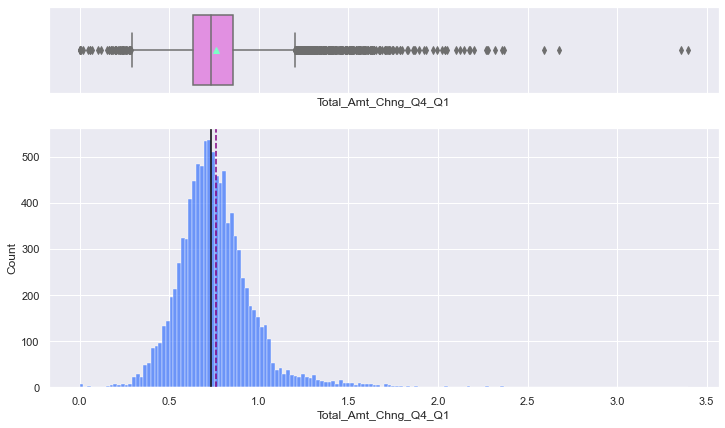

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

- The ratio of the total transaction amount in the 4th quarter and the total transaction amount in the 1st quarter have outliers below 0.3 and above 1.25

### 17. Total Transaction Amount

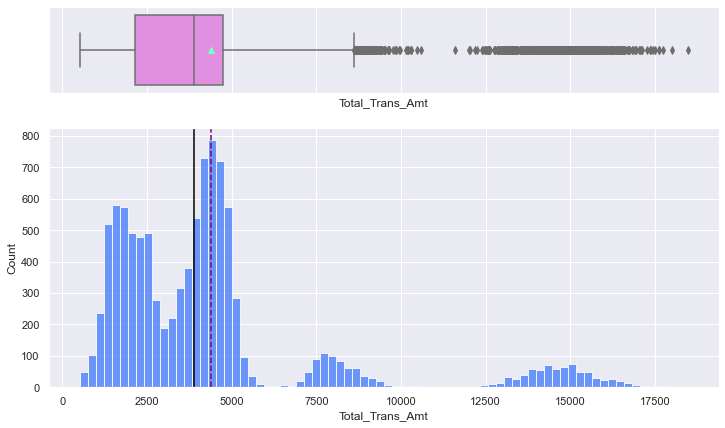

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(data, "Total_Trans_Amt")

- Total transaction amount in the past 12 months has a varying distribution 
- The mean transaction amount is around 4.5K and the median is around 4K
- Outliers above the upper whisker in the ranges 7K to 10K and 12K to 17K

### 18. Total Transaction Count

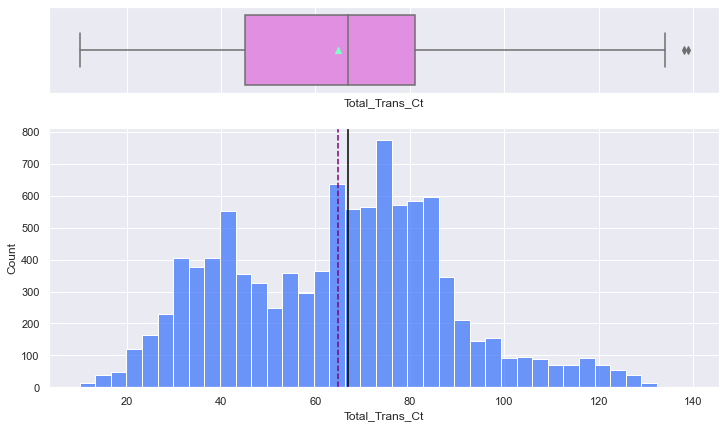

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(data, "Total_Trans_Ct")

- The mean and median of the total transaction count for the past 12 months are almost close to each other
- There are large number of customers making transactions between 65 to 85 times
- Outliers visible above 130 transactions. This needs to be further explored for data entry error

In [39]:
data[data["Total_Trans_Ct"] > 130]

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
9213   719413383  Existing Customer            32      M                1   
9261   716430933  Existing Customer            46      F                4   
9269   711010683  Existing Customer            35      M                3   
9324   708163758  Existing Customer            41      M                3   
9339   715728108  Existing Customer            27      F                0   
9586   784868958  Existing Customer            56      F                1   
9629   709015833  Existing Customer            42      M                2   
9728   710699283  Existing Customer            46      M                2   
9841   715601808  Existing Customer            50      M                3   
10085  717714633  Existing Customer            49      M                3   

      Education_Level Marital_Status Income_Category Card_Category  \
9213       Uneducated         Single     $60K - $80K        Silver   
9261              NaN         Single  Less than $40K          Blue   
9269      High School        Married     $40K - $60K          Blue   
9324              NaN        Married         $120K +          Blue   
9339         Graduate            NaN  Less than $40K          Blue   
9586      High School        Married             abc          Blue   
9629         Graduate         Single     $60K - $80K        Silver   
9728         Graduate         Single         $120K +          Blue   
9841         Graduate        Married         $120K +          Blue   
10085      Uneducated        Married         $120K +          Gold   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
9213               36                         2                       3   
9261               36                         2                       1   
9269               27                         1                       2   
9324               33                         2                       4   
9339               36                         1                       1   
9586               49                         1                       2   
9629               36                         3                       3   
9728               28                         1                       1   
9841               41                         4                       2   
10085              38                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
9213                       1     33711.000                 1437   
9261                       2      3973.000                    0   
9269                       3     14382.000                 1950   
9324                       3     34516.000                  638   
9339                       2      4548.000                 1450   
9586                       1     17542.000                 2517   
9629                       2     34516.000                    0   
9728                       1      7790.000                 1921   
9841                       3     34516.000                 2253   
10085                      4     14938.000                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9213         32274.000                 0.942            14880             134   
9261          3973.000                 0.890            13740             131   
9269         12432.000                 0.578            12941             131   
9324         33878.000                 0.724            13085             139   
9339          3098.000                 0.844            14330             131   
9586         15025.000                 0.800            13939             138   
9629         34516.000                 0.774            12920             132   
9728          5869.000                 0.789            14567             131   
9841         32263.000                 1.032            16692             131   
10085        1

<IPython.core.display.Javascript object>

- Customers with total transaction count > 130 seems to be holding Blue/Silver credit card with total transaction amount between 12K and 16K. There seems to be some sort of true pattern and does not look like any data entry error

### 19. Total Count Change Q4_Q1

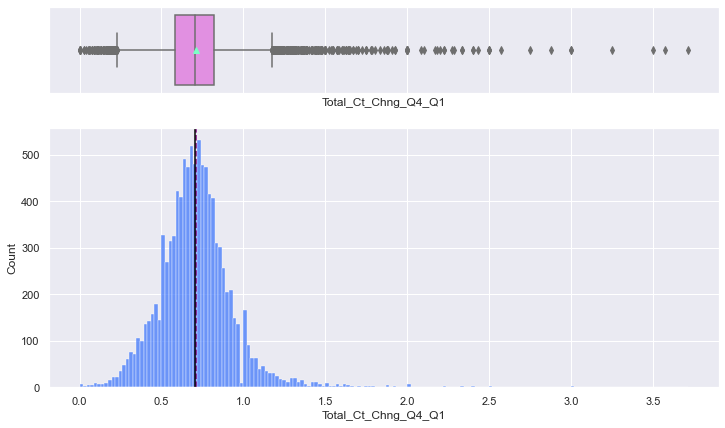

<IPython.core.display.Javascript object>

In [40]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

- The ratio of the total transaction count in the 4th quarter to the 1st quarter shows a normal distribution with outliers on either sides
- There seems to be a sharp dip around 1
- The outliers above the upper whisker extend above 3.5

### 20. Average Utilization Ratio

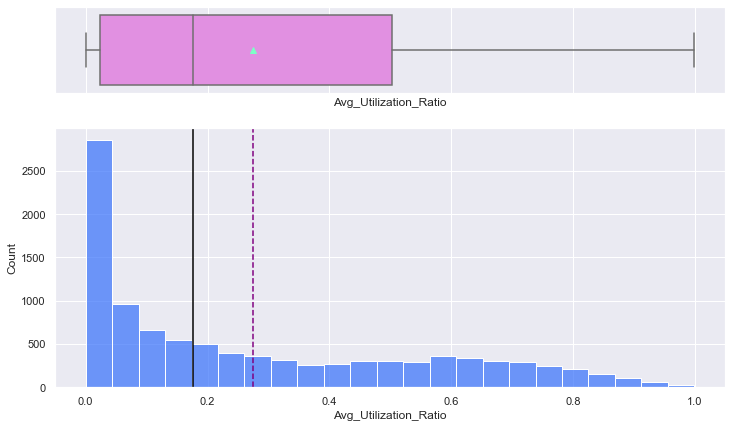

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

- The above distribution indicates that most of the customers do not spend the credit available on their card

## Bivariate Analysis

In [42]:
# User defined function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """Print the category counts and plot a stacked bar chart
    data : dataframe
    predictor : independent variable
    target : target variable"""

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)
    plt.show()

<IPython.core.display.Javascript object>

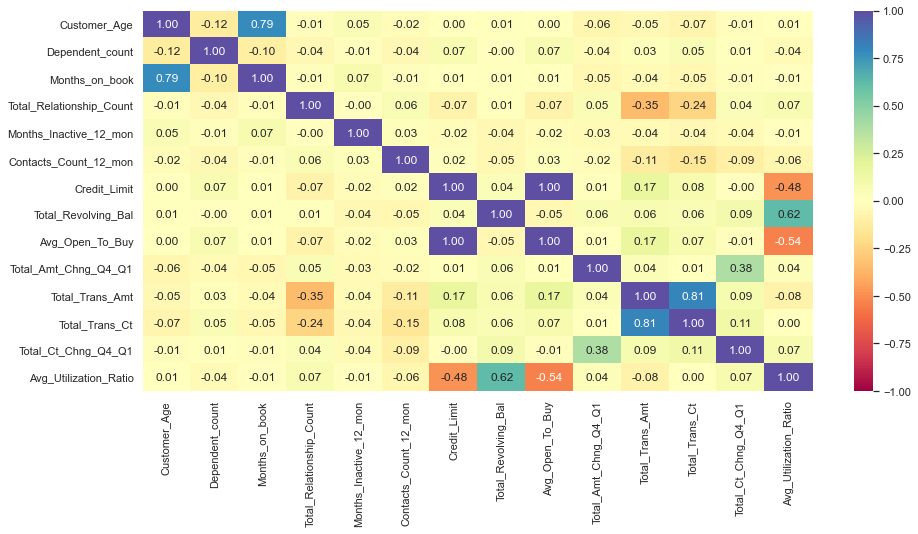

<IPython.core.display.Javascript object>

In [43]:
data1 = data.copy().drop("CLIENTNUM", axis=1)
plt.figure(figsize=(15, 7))
sns.heatmap(data1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Credit_Limit is in perfect correlation with Avg_Open_To_Buy
- Total_Trans_Ct has a strong positive correlation with Total_Trans_Amt
- Months_on_book has a positive correlation with Customer_Age and Avg_Utilization_Ratio with Total+Revolving_Bal
- Total_Ct_Chng_Q4_Q1 has a positive correlation with Total_Amt_Chng_Q4_Q1
- Avg_Utilization_Ratio has positive correlation with Total_Revolving_Bal and notable amount of negative correlations with Avg_Open_To_Buy and Credit_Limit
- Total_Relationship_Count has negative correlations with Total_Trans_Amt and Total_Trans_Ct

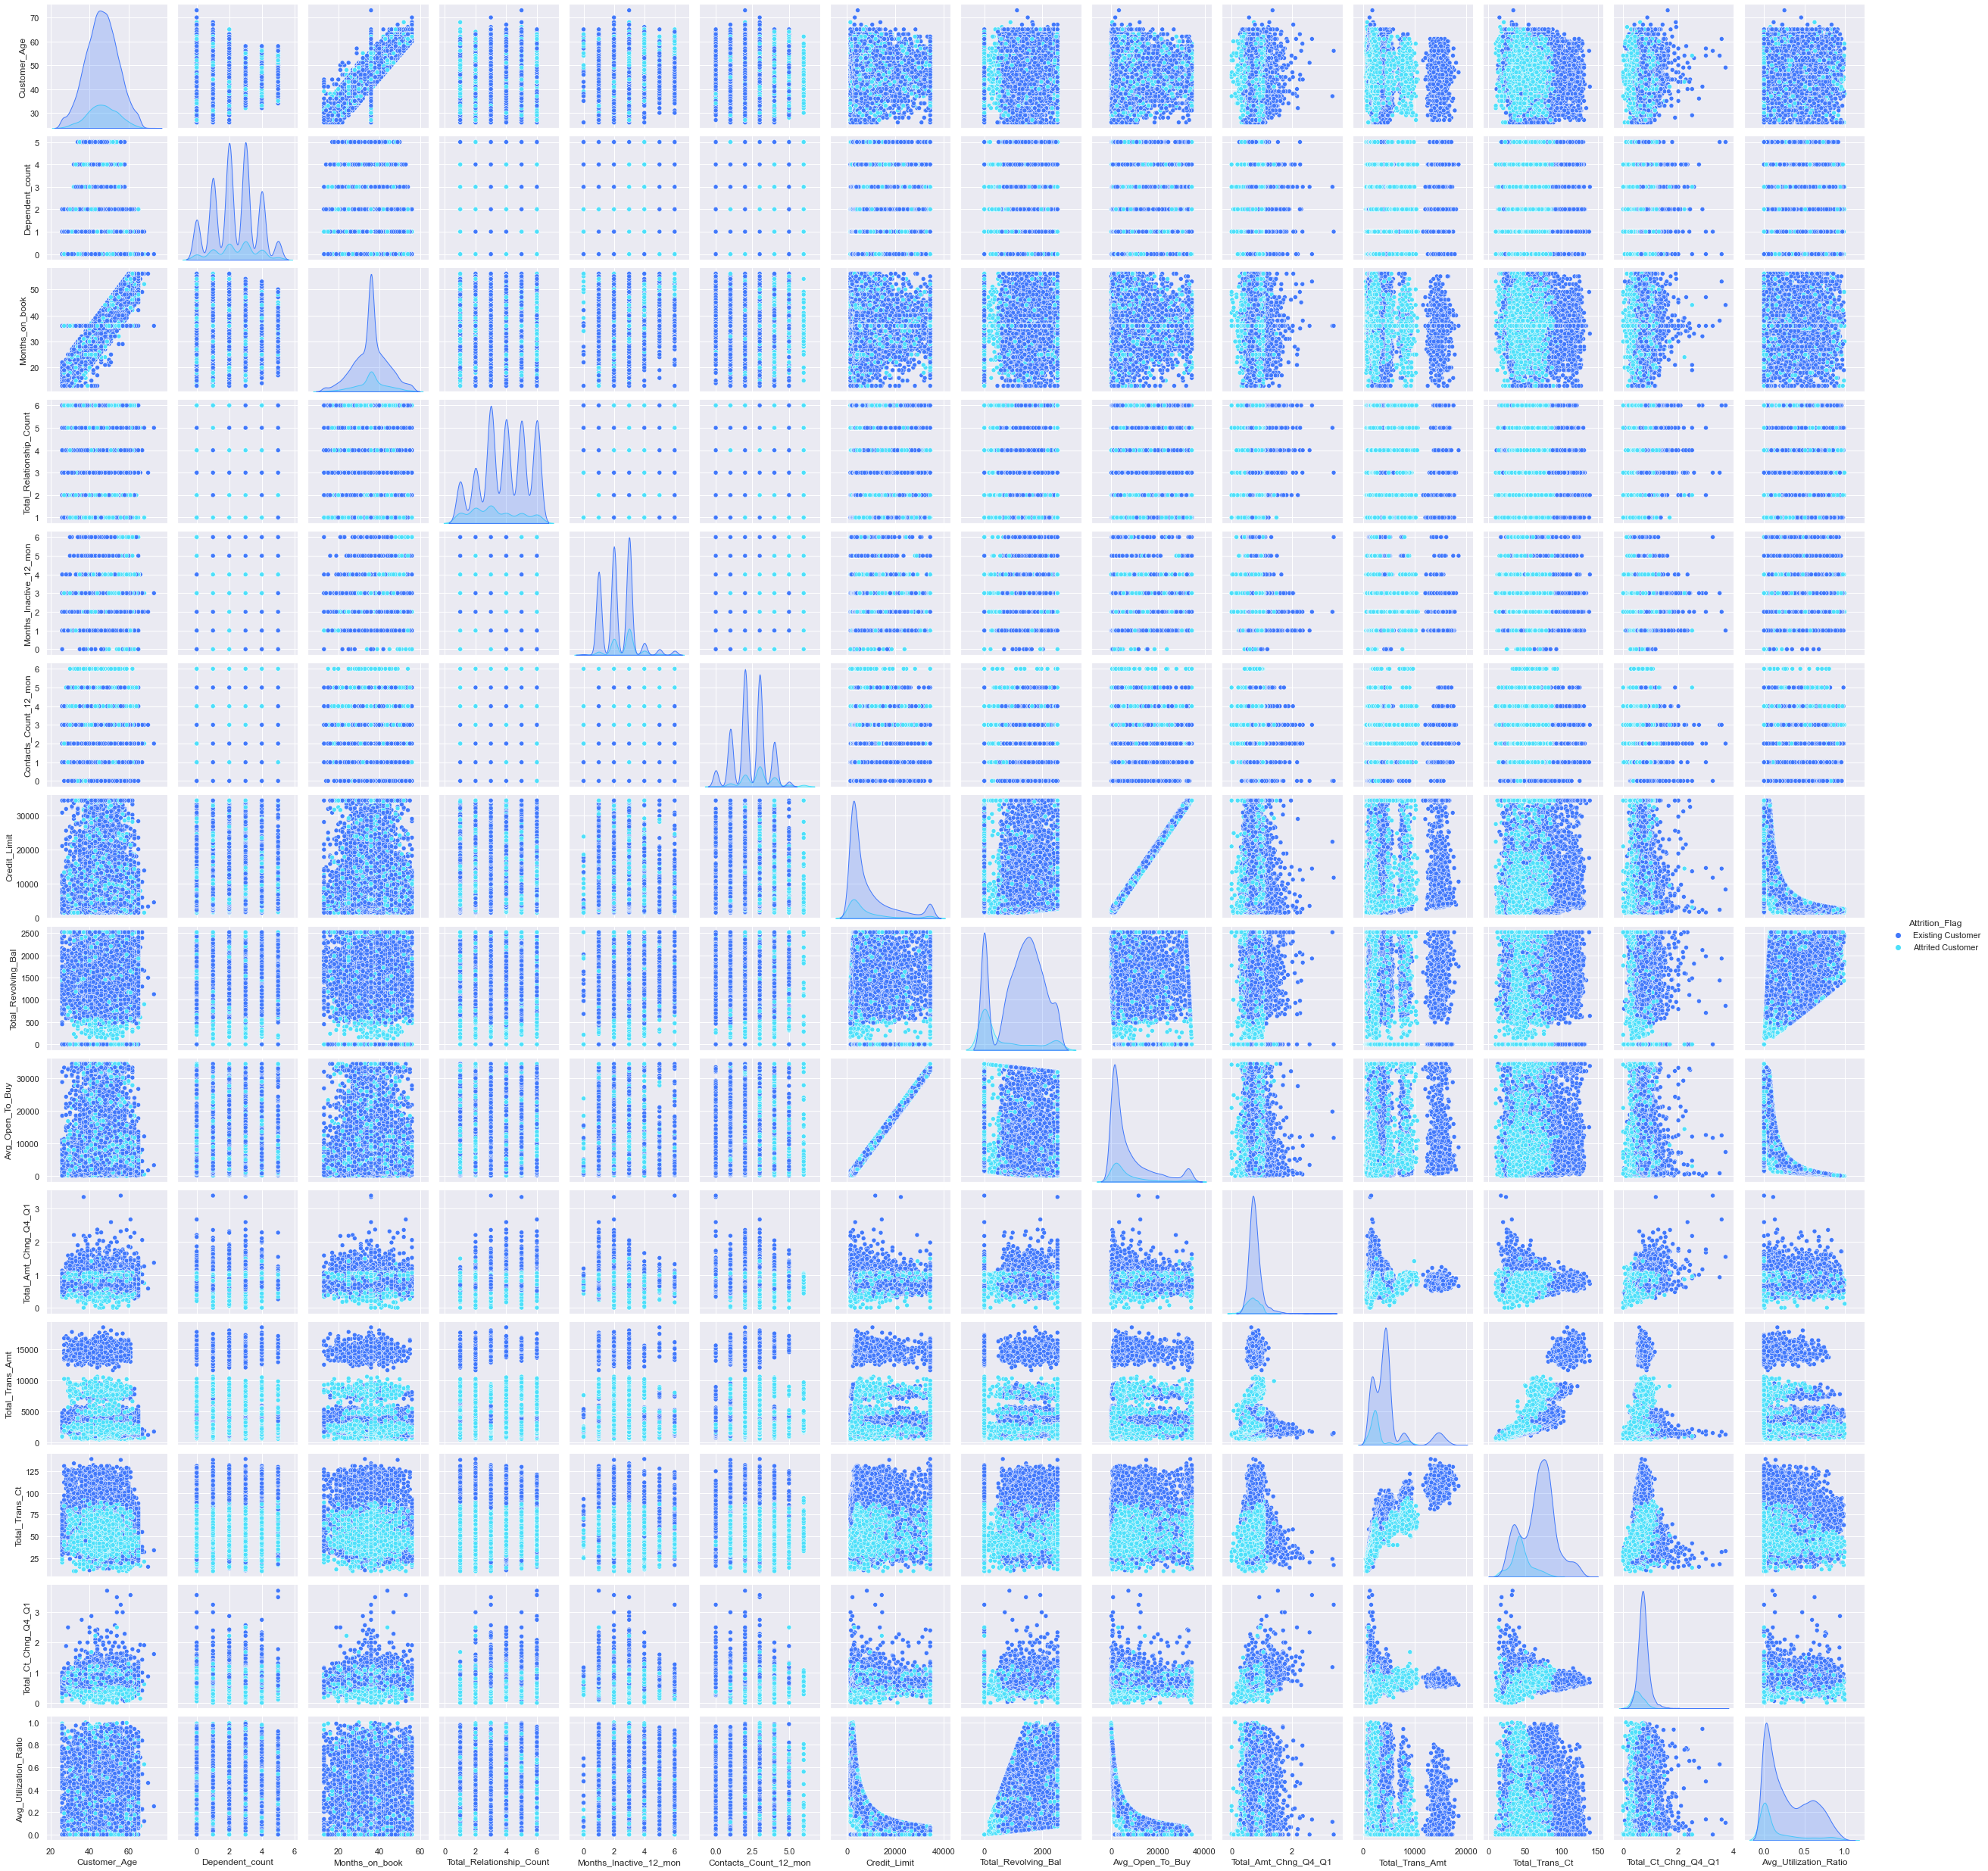

<IPython.core.display.Javascript object>

In [44]:
sns.pairplot(data1, hue="Attrition_Flag")
plt.show()

- It is seen that lower the Total_Trans_Amt and Total_Trans_Ct larger the number of attrited customers
- Avg_Open_To_Buy and Credit_Limit are in perfect correlation with each other
- Imbalance of classes in the target variable

### 1. Target vs Gender

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769


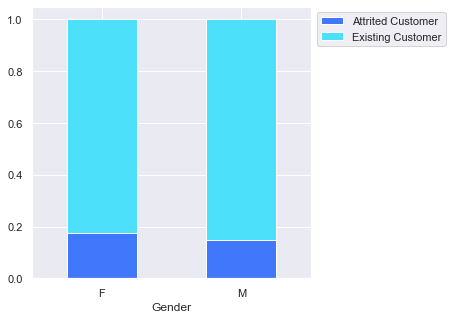

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(data, "Gender", "Attrition_Flag")

- 5358 out of 10127 customers are Female
- 930 out of 5358 Female customers have attrited
- 697 out of 4769 Male customers have attrited

### 2. Target vs Dependent Count

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424


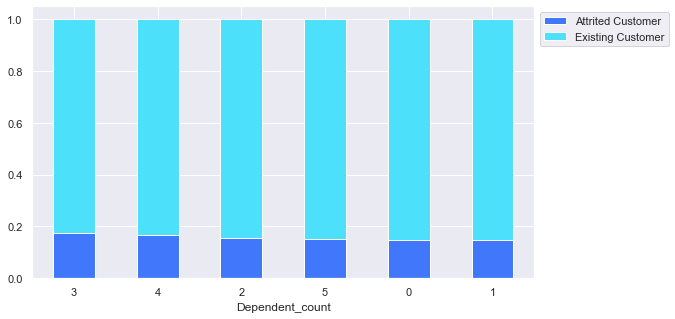

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

- Customers with 3 dependents have attrited more followed by customers with 2 and 1 dependents
- Customers with 5 dependents have the least attrition count

### 3. Target vs Education Level

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516


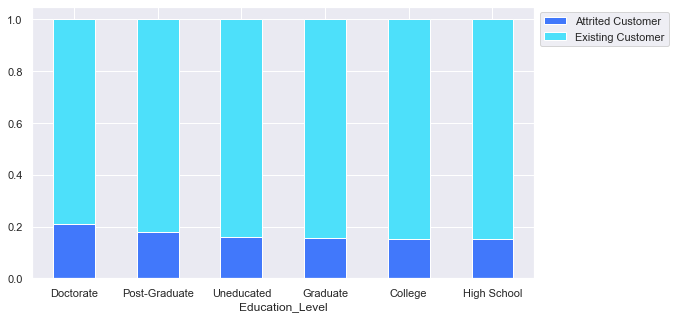

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

- 'Graduate' customers have attrited more as most of the customers are Graduates
- Customers with highest education level of Doctorate and Post-Graduate show low attrition count comparatively

### 4. Target vs Marital Status

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748


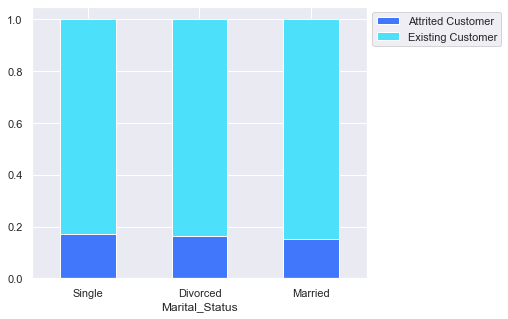

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

- 'Single' customers attrite more in comparison to 'Divorced' and 'Married' customers

### 5. Target vs Income Category

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727


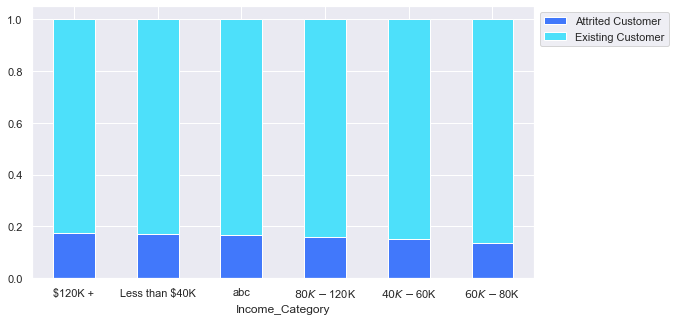

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

- Customers with annual income more less than 40K have attrited more followed by income range 40K-60K
- Customers with annual income greater than 120K show lower attrition rate comparatively
- Customers' with annual income that is unknown (abc) are the second least in attrition

### 6. Target vs Card Category

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20


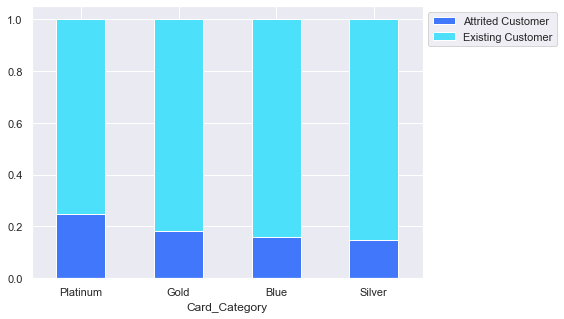

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

- 'Blue' card holders are larger in number and 1519 out of 7917 customers have attrited 
- Only 15 customers hold the 'Platinum' card and 5 out them have attrited
- 'Silver' and 'Gold' card holders are inbetween the above two

### 7. Target with Months on book

Attrition_Flag  Attrited Customer  Existing Customer    All
Months_on_book                                             
All                          1627               8500  10127
36                            430               2033   2463
39                             64                277    341
37                             62                296    358
30                             58                242    300
38                             57                290    347
34                             57                296    353
41                             51                246    297
33                             48                257    305
40                             45                288    333
35                             45                272    317
32                             44                245    289
28                             43                232    275
44                             42                188    230
43                             42       

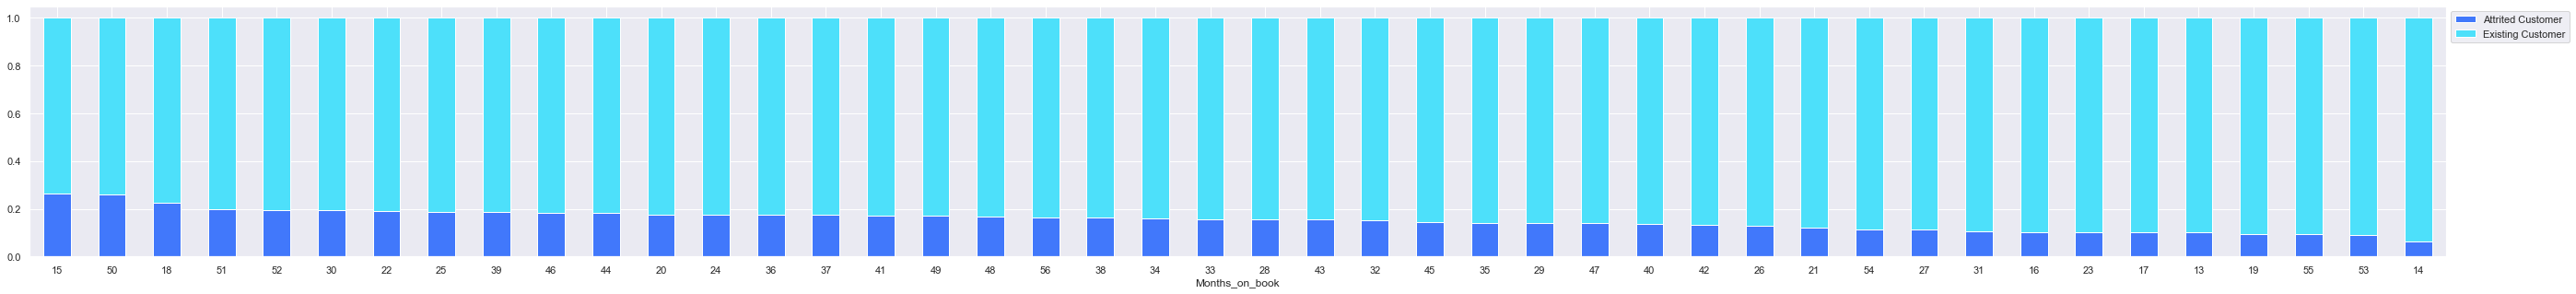

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(data, "Months_on_book", "Attrition_Flag")

- Customers with 15 and 50 months of relationship with the bank show higher attrition rate comparatively
- Out of 2463 customers who are with the bank for 36 months, 430 have attrited

### 8. Target vs Total Relationship Count

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866


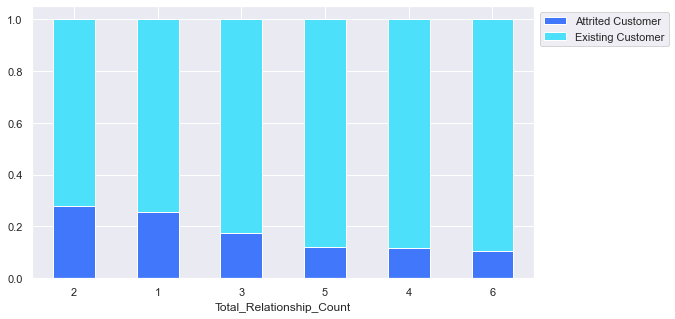

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

- Customers holding three products or more with the bank show a lower attrition rate in comparison to the customers holding 1 or 2 products

### 9. Target vs Months inactive

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29


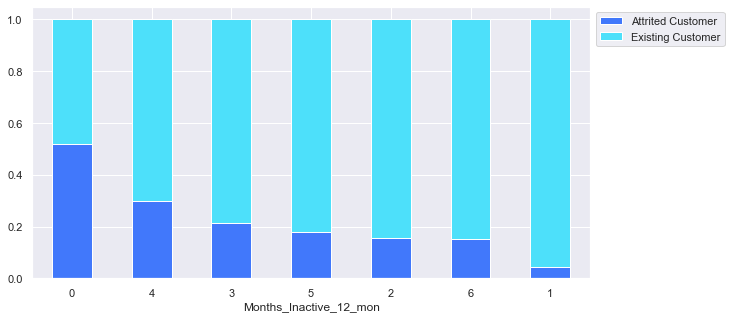

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

- Most customers who have been inactive for 4/3 months have attrited more in comparison to those who have been inactive for 1/0 months

### 10. Target vs Contacts count 

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399


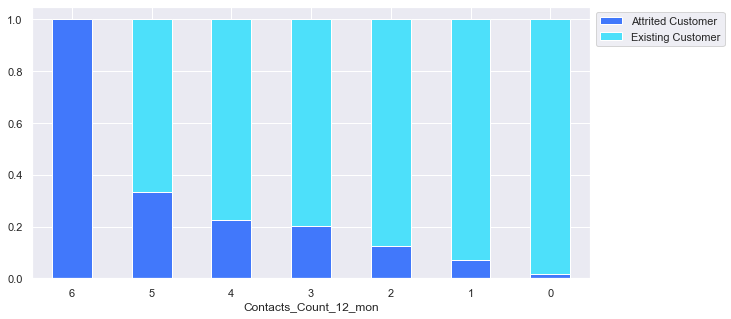

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

- The maximum number of contacts between the bank and customer is 6 and all customers with this count have attrited. Maybe the customer had some issues and have large number of contacts with the bank and had to attrite as the issue was not resolved. 
- The pattern here indicates as the number of contacts with the bank increases, the attrition rate also increases. This implies that the bank must try to resolve customer's issues promptly

### Target vs Continuous data

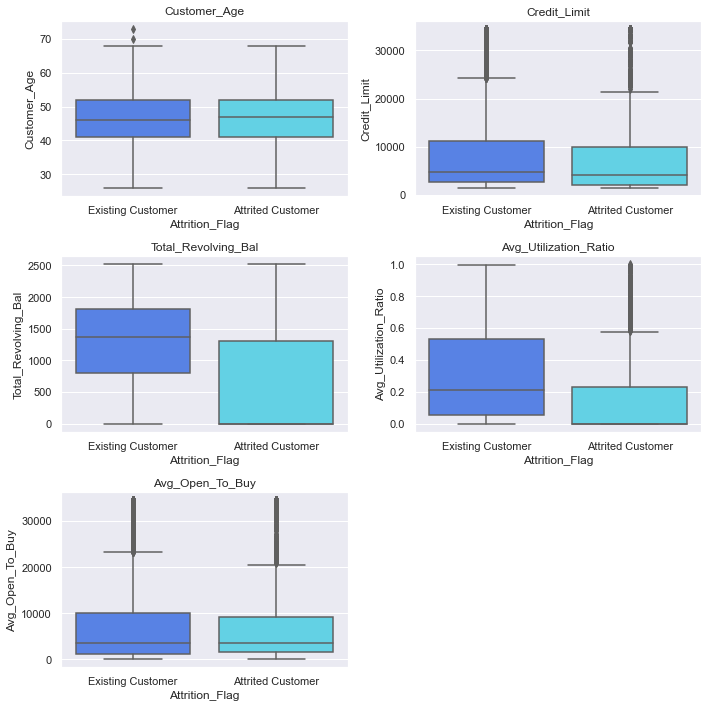

<IPython.core.display.Javascript object>

In [55]:
cols1 = data[
    [
        "Customer_Age",
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Avg_Utilization_Ratio",
        "Avg_Open_To_Buy",
    ]
]

plt.figure(figsize=(10, 10))
for i, variable in enumerate(cols1):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- The IQR of customers age is almost same for both existing and attrited customers. However, there are existing customers around 70 years of age
- The customer with lower credit_limit IQR seem to attrite in comparison to those customers with larger credit_limit IQR
- Attrition is high among customers whose carry forward (revolving) balance is low
- Customers who spend very less available credit seem to have higher attrition rate
- Avg_Open_To_Buy shows similar pattern to Credit_Limit as expected, since they are in perfect correlation

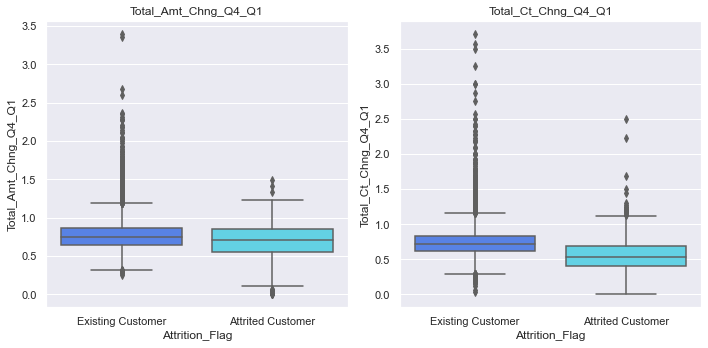

<IPython.core.display.Javascript object>

In [56]:
cols2 = data[["Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1"]]

plt.figure(figsize=(10, 5))
for i, variable in enumerate(cols2):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- The IQR of the ratio of total transaction amount for Q4_Q1 for existing customers is smaller than that of the attrited customers
- The IQR of the ratio of the total transaction count for Q4_Q1 for existing customers is smaller than that of the attrited customers
- There are more outliers for the existing customers in comparison to the attrited customers

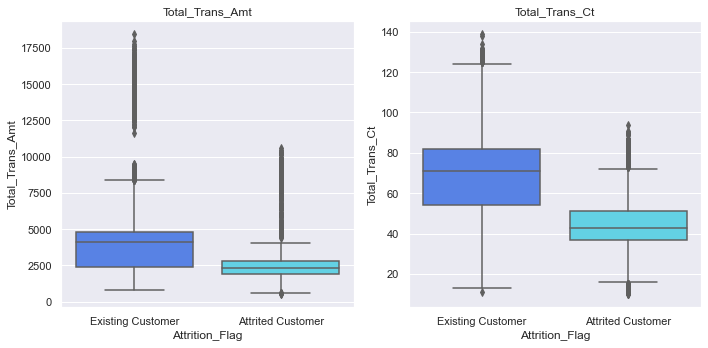

<IPython.core.display.Javascript object>

In [57]:
cols3 = data[["Total_Trans_Amt", "Total_Trans_Ct"]]

plt.figure(figsize=(10, 5))
for i, variable in enumerate(cols3):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- The IQR of the total transaction amount for the existing customers is between 2.5K and 5K and around 2.5K for the attrited customers i.e., customers with lower transaction amount in the past 12 months seems to attrite more
- Similarly, customers with lower transaction count in the past 12 months seems to attrite more comparatively

# Key Insights from EDA

- About 52% of customers are Female
- Large number of customers have either 3 or 2 dependents
- More number of graduate customers followed by high school and uneducated customers
- Large number of customers are married
- Most customers have an average annual income less than 40K
- About 93% of customers hold the 'Blue' card. This being the basic card issued by the bank, it is affordable to the customers with income less than 40K
- 'Blue' card is the basic card and it is owned by maximum number of customers
- 'Platinum' card is owned by least number of customer

Attrition rate is more common among :
- Female customers
- Customers with three or less number of dependents
- Postgraduate or Doctorate customers
- Married customers with an income less than 40K and own a 'Blue' card
- Larger the number of contacts with the bank, larger the chances that the customer will churn
- Customers holding less number of products with the bank
- Customers who do not have any revolving balance left
- Cutomers having 1K or less balance amount left on their credit card
- Customers who do not utilize the credit available on their card
- Larger the number of monthly inactive rate, higher the chances for the customer to attrite

# Data Preparation for Modeling

In [58]:
# Dropping CLIENTNUM and Avg_Open_To_Buy columns
# Avg_Open_To_Buy is dropped as it is in perfect positive correlation with the Credit_Limit column

data.drop(["CLIENTNUM", "Avg_Open_To_Buy"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [59]:
# Replacing 'abc' in the Income_Category with 'Unknown'
# Not going to treat it as missing value because some customers might choose not to disclose their income

data["Income_Category"] = data["Income_Category"].replace("abc", "Unknown")

<IPython.core.display.Javascript object>

In [60]:
# Encoding the target variable

data["Attrition_Flag"] = data["Attrition_Flag"].apply(
    lambda x: 1 if x == "Attrited Customer" else 0
)

<IPython.core.display.Javascript object>

In [61]:
# Creating a list of categorical columns

cat_cols = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Dependent_count",
    "Total_Relationship_Count",
]

<IPython.core.display.Javascript object>

In [62]:
# Converting the datatypes of features in cat_cols to 'category'

for columns in cat_cols:
    data[columns] = data[columns].astype("category")

<IPython.core.display.Javascript object>

In [63]:
data.shape

(10127, 19)

<IPython.core.display.Javascript object>

- There are 10127 rows and 19 columns

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<IPython.core.display.Javascript object>

- Now there are a total of 8 category, 4 float and 7 integer type columns
- Total memory usage is 951KB

## Split Data

In [65]:
# Separating the dependent and independent variables

X = data.drop("Attrition_Flag", axis=1)
y = data["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [66]:
# Splitting data into training, validation and test set
# Splitting data into 2 parts, temporary and test set

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Splitting the temporary set into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 18) (2026, 18) (2026, 18)


<IPython.core.display.Javascript object>

In [67]:
print("Number of rows in train data : ", X_train.shape[0])
print("Number of rows in validation data : ", X_val.shape[0])
print("Number of rows in test data : ", X_test.shape[0])

Number of rows in train data :  6075
Number of rows in validation data :  2026
Number of rows in test data :  2026


<IPython.core.display.Javascript object>

In [68]:
print("Counts of label 'Yes' in train data : {}".format(sum(y_train == 1)))
print("Counts of label 'No'in train data : {} \n".format(sum(y_train == 0)))
print("Counts of label 'Yes' in validation data : {}".format(sum(y_val == 1)))
print("Counts of label 'No' in validation data: {} \n".format(sum(y_val == 0)))
print("Counts of label 'Yes' in test data : {}".format(sum(y_test == 1)))
print("Counts of label 'No' in test data : {} \n".format(sum(y_test == 0)))

Counts of label 'Yes' in train data : 976
Counts of label 'No'in train data : 5099 

Counts of label 'Yes' in validation data : 326
Counts of label 'No' in validation data: 1700 

Counts of label 'Yes' in test data : 325
Counts of label 'No' in test data : 1701 



<IPython.core.display.Javascript object>

In [69]:
print("Percentage of classes in training set :")
print(y_train.value_counts(normalize=True))
print("\nPercentage of classes in validation set :")
print(y_val.value_counts(normalize=True))
print("\nPerentage of classes in test set :")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set :
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64

Percentage of classes in validation set :
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64

Perentage of classes in test set :
0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64


<IPython.core.display.Javascript object>

- The ratio of the target classes are balanced across the train, validation and test sets

# Missing Value Treatment

In [70]:
data.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [71]:
# Creating a list of columns with missing values

cols_to_impute = ["Education_Level", "Marital_Status"]

# imputing the missing values with a constant 'Unknown', as there might be customers in real life who do not prefer
# to disclose their Education_Level or Marital_status

imputer = SimpleImputer(strategy="constant", fill_value="Unknown")

X_train[cols_to_impute] = imputer.fit_transform(X_train[cols_to_impute])
X_val[cols_to_impute] = imputer.transform(X_val[cols_to_impute])
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])

<IPython.core.display.Javascript object>

# Outlier Treatment

- As seen in the EDA, most of the numerical columns have outliers. However, I choose not to treat them, as in real world the data will have outliers and I want the model to learn the variations in the datapoints.

# Feature Engineering

In [72]:
# Ordinal encoding the features Education_Level, Card_Category and Income_Category
# ordinal encoding Income_Category as the type of credit card issued by the bank depends on the income of the customer

oe = OrdinalEncoder(
    categories=[
        [
            "Unknown",
            "Uneducated",
            "High School",
            "College",
            "Graduate",
            "Post-Graduate",
            "Doctorate",
        ],
        ["Blue", "Silver", "Gold", "Platinum"],
        [
            "Unknown",
            "Less than $40K",
            "$40K - $60K",
            "$60K - $80K",
            "$80K - $120K",
            "$120K +",
        ],
    ]
)

X_train[["Education_Level", "Card_Category", "Income_Category"]] = oe.fit_transform(
    X_train[["Education_Level", "Card_Category", "Income_Category"]]
)
X_val[["Education_Level", "Card_Category", "Income_Category"]] = oe.transform(
    X_val[["Education_Level", "Card_Category", "Income_Category"]]
)
X_test[["Education_Level", "Card_Category", "Income_Category"]] = oe.transform(
    X_test[["Education_Level", "Card_Category", "Income_Category"]]
)

<IPython.core.display.Javascript object>

In [73]:
# checking if the columns have been ordinal encoded

X_train.head()

Customer_Age Gender Dependent_count  Education_Level Marital_Status  \
800             40      M               2            0.000         Single   
498             44      M               1            0.000        Married   
4356            48      M               4            2.000        Married   
407             41      M               2            4.000        Unknown   
8728            46      M               4            2.000       Divorced   

      Income_Category  Card_Category  Months_on_book Total_Relationship_Count  \
800             5.000          0.000              21                        6   
498             0.000          0.000              34                        6   
4356            4.000          0.000              36                        5   
407             3.000          1.000              36                        6   
8728            2.000          1.000              36                        2   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
800                        4                      3     20056.000   
498                        2                      0      2885.000   
4356                       1                      2      6798.000   
407                        2                      0     27000.000   
8728                       2                      3     15034.000   

      Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
800                  1602                 0.466             1687   
498                  1895                 0.387             1366   
4356                 2517                 0.873             4327   
407                     0                 0.610             1209   
8728                 1356                 0.754             7737   

      Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
800               46                0.533                  0.080  
498               31                0.632                  0.657  
4356              79                0.881                  0.370  
407               39                0.300                  0.000  
8728              84                0.750                  0.090

<IPython.core.display.Javascript object>

In [74]:
# Creating dummy variables for the categorical features

X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

<IPython.core.display.Javascript object>

In [75]:
print("Number of columns in train data : ", X_train.shape[1])
print("Number of columns in validation data : ", X_val.shape[1])
print("Number of columns in test data : ", X_test.shape[1])

Number of columns in train data :  28
Number of columns in validation data :  28
Number of columns in test data :  28


<IPython.core.display.Javascript object>

In [76]:
# Checking if the columns are properly encoded

X_train.head()

Customer_Age  Education_Level  Income_Category  Card_Category  \
800             40            0.000            5.000          0.000   
498             44            0.000            0.000          0.000   
4356            48            2.000            4.000          0.000   
407             41            4.000            3.000          1.000   
8728            46            2.000            2.000          1.000   

      Months_on_book  Months_Inactive_12_mon  Contacts_Count_12_mon  \
800               21                       4                      3   
498               34                       2                      0   
4356              36                       1                      2   
407               36                       2                      0   
8728              36                       2                      3   

      Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
800      20056.000                 1602                 0.466   
498       2885.000                 1895                 0.387   
4356      6798.000                 2517                 0.873   
407      27000.000                    0                 0.610   
8728     15034.000                 1356                 0.754   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
800              1687              46                0.533   
498              1366              31                0.632   
4356             4327              79                0.881   
407              1209              39                0.300   
8728             7737              84                0.750   

      Avg_Utilization_Ratio  Gender_M  Dependent_count_1  Dependent_count_2  \
800                   0.080         1                  0                  1   
498                   0.657         1                  1                  0   
4356                  0.370         1                  0                  0   
407                   0.000         1                  0                  1   
8728                  0.090         1                  0                  0   

      Dependent_count_3  Dependent_count_4  Dependent_count_5  \
800                   0                  0                  0   
498                   0                  0                  0   
4356                  0                  1                  0   
407                   0                  0                  0   
8728                  0                  1                  0   

      Marital_Status_Married  Marital_Status_Single  Marital_Status_Unknown  \
800                        0                      1                       0   
498                        1                      0                       0   
4356                       1                      0                       0   
407                        0                      0                       1   
8728                       0                      0                       0   

      Total_Relationship_Count_2  Total_Relationship_Count_3  \
800                            0                           0   
498                            0                           0   
4356                           0                           0   
407                            0                           0   
8728                           1                           0   

      Total_Relationship_Count_4  Total_Relationship_Count_5  \
800                            0                           0   
498                            0                           0   
4356                           0                           1   
407                            0                           0   
8728                           0                           0   

      Total_Relationship_Count_6  
800                            1  
498                            1  
4356                           0  
407                            1  
8728                           0

<IPython.core.display.Javascript object>

In [77]:
# checking if the number of columns of train, validation and test sets are same
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 28) (2026, 28) (2026, 28)


<IPython.core.display.Javascript object>

- They are all the same. Now all three sets of data are ready for model building.

# Model evaluation criterion

#### Model can make wrong predictions such as :

1. Prediciting a customer will renounce their credit card but in reality the customer will not
2. Predicting a customer will continue with their credit card services but in reality the customer will not

#### Prediction of concern :

The second prediction is our major concern as customers' leaving credit card services would lead the bank to loss and our aim is to build a model to help the bank improve its services so that the customers do not renounce their credit cards.

#### How to reduce False Negatives :

**Recall** score should be maximized. Greater the Recall score, higher the chances of predicting the potential customers who may renounce their credit cards.

## User-defined functions to evaluate and plot metric scores

In [78]:
# defining a function to compute different metrics to check performance of classification models built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    
    model : classifier
    predictors : independent variables
    target : dependent variable
    """

    # predicting using the independent varaibles
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0]
    )

    return df_perf

<IPython.core.display.Javascript object>

In [79]:
# defining a function to plot the confusion matrix


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

# Model Building - Original Data

In [80]:
# K-Folds cross validation of the model performance

models1 = []  # Empty list to store all the models

# Appending models to the list
models1.append(("LR", LogisticRegression(solver="newton-cg", random_state=1)))
models1.append(("Dtree", DecisionTreeClassifier(random_state=1)))
models1.append(("Bagging", BaggingClassifier(random_state=1)))
models1.append(("Random Forest", RandomForestClassifier(random_state=1)))
models1.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models1.append(("GBM", GradientBoostingClassifier(random_state=1)))
models1.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all models' CV scores
names1 = []  # Empty list to store name of the models

# Loop through all the models to get the mean cross validated score
print("Cross-Validation Performance on Original Data :\n")

for name, model in models1:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting the number of splits to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results1.append(cv_result)
    names1.append(name)
    print("{} : {}".format(name, cv_result.mean() * 100))

print("\nTraining Performance on Original Data :\n")
for name, model in models1:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{} : {}".format(name, scores))

print("\nValidation Performance on Original Data :\n")
for name, model in models1:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{} : {}".format(name, scores))

Cross-Validation Performance on Original Data :

LR : 56.145473574045
Dtree : 76.63265306122449
Bagging : 77.76295133437989
Random Forest : 76.32757718472004
Adaboost : 81.24594453165882
GBM : 81.7556253270539
XGBoost : 85.03767660910519

Training Performance on Original Data :

LR : 57.684426229508205
Dtree : 100.0
Bagging : 98.97540983606558
Random Forest : 100.0
Adaboost : 85.14344262295081
GBM : 87.19262295081968
XGBoost : 100.0

Validation Performance on Original Data :

LR : 61.65644171779141
Dtree : 78.52760736196319
Bagging : 80.3680981595092
Random Forest : 80.06134969325154
Adaboost : 82.51533742331289
GBM : 84.04907975460122
XGBoost : 89.2638036809816


<IPython.core.display.Javascript object>

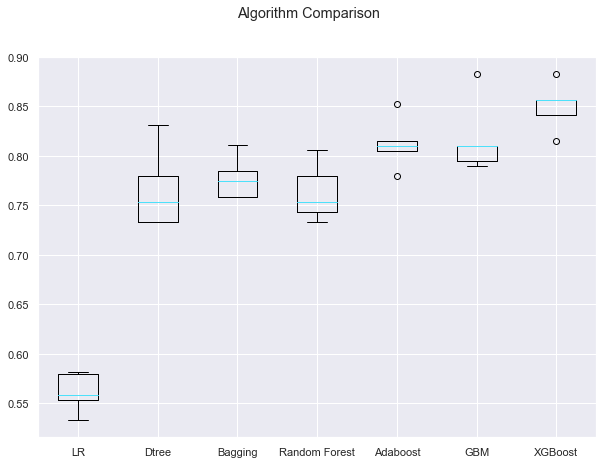

<IPython.core.display.Javascript object>

In [81]:
# Plotting boxplots for CV scores of models defined above

fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

- XGBoost model is giving the highest cross-validated recall followed by GBM and Adaboost
- However, these models are all slightly overfit as the validation recall scores are lower than the train recall scores
- Although the logistic regression model has the lowest CV score, it is generalizing well on the train and validation sets
- Highest validation recall achieved on the original data is 89

# Model Building - Oversampled Data

In [82]:
# oversampling train data using SMOTE

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [83]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 28)
After UpSampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

In [84]:
# K-Folds cross validation of the model performance

models2 = []  # Empty list to store all the models

# Appending models to the list
models2.append(("LR", LogisticRegression(solver="newton-cg", random_state=1)))
models2.append(("Dtree", DecisionTreeClassifier(random_state=1)))
models2.append(("Bagging", BaggingClassifier(random_state=1)))
models2.append(("Random Forest", RandomForestClassifier(random_state=1)))
models2.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models2.append(("GBM", GradientBoostingClassifier(random_state=1)))
models2.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results2 = []  # Empty list to store all models' CV scores
names2 = []  # Empty list to store name of the models

# Loop through all the models to get the mean cross validated score
print("Cross-Validation Performance on Original Data :\n")

for name, model in models2:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting the number of splits to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results2.append(cv_result)
    names2.append(name)
    print("{} : {}".format(name, cv_result.mean() * 100))

print("\nTraining Performance on Oversampled Data :\n")
for name, model in models1:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{} : {}".format(name, scores))

print("\nValidation Performance on Oversampled Data :\n")
for name, model in models1:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{} : {}".format(name, scores))

Cross-Validation Performance on Original Data :

LR : 91.44974888876062
Dtree : 94.9402143585599
Bagging : 95.97973792068348
Random Forest : 97.84275241009063
Adaboost : 96.52885373972944
GBM : 97.37218341703708
XGBoost : 98.07816198118108

Training Performance on Oversampled Data :

LR : 91.62580898215337
Dtree : 100.0
Bagging : 99.84310649146892
Random Forest : 100.0
Adaboost : 96.54834281231615
GBM : 98.13688958619338
XGBoost : 100.0

Validation Performance on Oversampled Data :

LR : 66.25766871165644
Dtree : 79.4478527607362
Bagging : 85.88957055214725
Random Forest : 85.2760736196319
Adaboost : 88.95705521472392
GBM : 89.87730061349694
XGBoost : 91.1042944785276


<IPython.core.display.Javascript object>

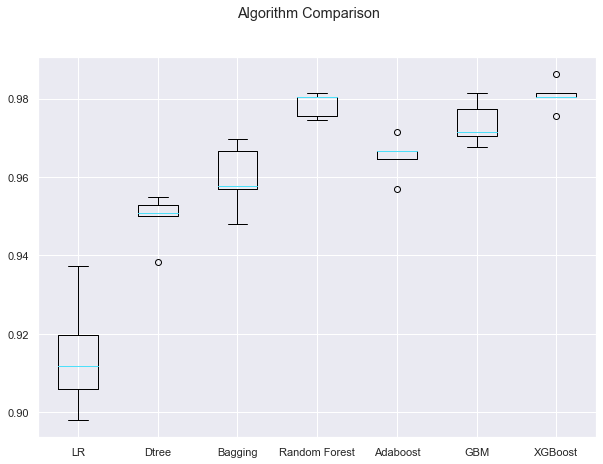

<IPython.core.display.Javascript object>

In [85]:
# Plotting boxplots for CV scores of models defined above

fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

- XGBoost is giving the highest cross-validated recall followed by RandomForest and GBM
- However, these models are slightly overfit again as seen with the original data
- Logistic regression model has the least cross-validated score among all
- The boxplot shows that the performances of Bagging, Random Forest, GBM and LR are consistent without any outliers
- Highest validation recall achieved on the oversampled data is 91

# Model Building - Undersampled Data

In [86]:
# downsampling train data using RandomUnderSampler

rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [87]:
print("Before DownSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before DownSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After DownSampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After DownSampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After DownSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After DownSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before DownSampling, counts of label 'Yes': 976
Before DownSampling, counts of label 'No': 5099 

After DownSampling, counts of label 'Yes': 976
After DownSampling, counts of label 'No': 976 

After DownSampling, the shape of train_X: (1952, 28)
After DownSampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

In [88]:
# K-Folds cross validation of the model performance

models3 = []  # Empty list to store all the models

# Appending models to the list
models3.append(("LR", LogisticRegression(solver="newton-cg", random_state=1)))
models3.append(("Dtree", DecisionTreeClassifier(random_state=1)))
models3.append(("Bagging", BaggingClassifier(random_state=1)))
models3.append(("Random Forest", RandomForestClassifier(random_state=1)))
models3.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models3.append(("GBM", GradientBoostingClassifier(random_state=1)))
models3.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results3 = []  # Empty list to store all models' CV scores
names3 = []  # Empty list to store name of the models

# Loop through all the models to get the mean cross validated score
print("Cross-Validation Performance on Original Data :\n")

for name, model in models3:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting the number of splits to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results3.append(cv_result)
    names3.append(name)
    print("{} : {}".format(name, cv_result.mean() * 100))

print("\nTraining Performance on Undersampled Data :\n")
for name, model in models3:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) * 100
    print("{} : {}".format(name, scores))

print("\nValidation Performance on Undersampled Data :\n")
for name, model in models3:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val)) * 100
    print("{} : {}".format(name, scores))

Cross-Validation Performance on Original Data :

LR : 84.12087912087912
Dtree : 89.34536891679748
Bagging : 90.36944008372579
Random Forest : 93.03349031920462
Adaboost : 92.52171637885924
GBM : 94.16117216117217
XGBoost : 94.67399267399269

Training Performance on Undersampled Data :

LR : 85.34836065573771
Dtree : 100.0
Bagging : 98.66803278688525
Random Forest : 100.0
Adaboost : 95.1844262295082
GBM : 98.05327868852459
XGBoost : 100.0

Validation Performance on Undersampled Data :

LR : 86.1963190184049
Dtree : 91.1042944785276
Bagging : 92.02453987730061
Random Forest : 93.25153374233128
Adaboost : 93.86503067484662
GBM : 95.70552147239265
XGBoost : 96.0122699386503


<IPython.core.display.Javascript object>

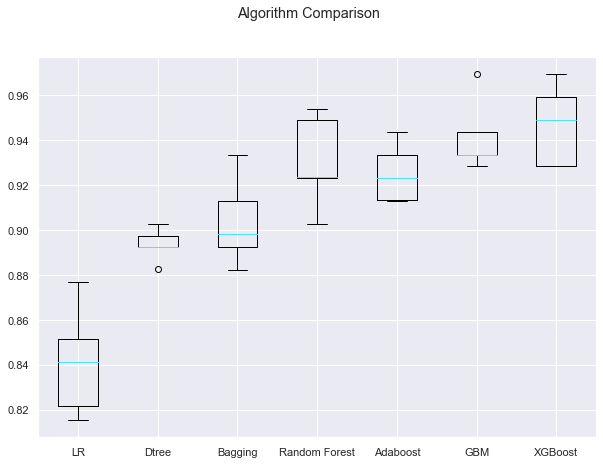

<IPython.core.display.Javascript object>

In [89]:
# Plotting boxplots for CV scores of models defined above

fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results3)
ax.set_xticklabels(names3)
plt.show()

- XGB is giving the highest cross-validated recall followed by GBM and Random Forest
- Logistic regression model is giving the least cross-validated recall as expected
- The boxplot shows that the performance of all models are consistent with no/one outlier
- Adaboost, GBM and XGBoost models are genearalizing well on train and validation sets
- In general, the model performance on the undersampled data has given the highest recall scores when compared to the original and oversampled data
- Highest validation recall achieved on the undersampled data is 96
- Overall all the models are giving really good validation scores on undersampled data

# Models to hypertune

### 1. LogisticRegression on Undersampled data
    
- Although this model gave the least recall (Train:85.348, Val:86.196) in the undersampled data, this model is the most generalized model of all. Hence want to check if tuning this model will give a better recall score. 

### 2. AdaBoost Classifier on Undersampled data
    
- Although this model is slightly overfit (Train:95.184, Val:93.865), it gave a very good recall score on the validation set. Hence want to tune this model to check it it gives a more generalized performance after hypertuning. Also, the boxplot for CV scores indicated this model to be very consistent without any outliers.

###  3. GradientBoosting Classifier on Undersampled data

- This model is also slightly overfit (Train:98.053, Val:95.705), it gave higher recall than the AdaBoost classifier. Hence chose to tune this model to check if it gives a recall above 95 after hypertuning. The boxplot for CV scores shows this model to be consistent with only one outlier.

### 4. XGBoost Classifier on Oversampled data

- This model again is a slightly overfit model (Train:100.0, Val:91.104). However, the boxplot for CV scores shows the IQR of this model is concentrated aroun 98% of recall score. Hence chose to tune this model hoping to get a more generalized model with higher recall scores.

# Hyperparameter Tuning

## 1. Logistic Regression on Undersampled data

In [90]:
# Building the model
lr_un = LogisticRegression(random_state=1, solver="newton-cg")
lr_un.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

In [91]:
# Model performance with default parameters

lr_un_train_perf = model_performance_classification_sklearn(
    lr_un, X_train_un, y_train_un
)
print("Training performance :")
lr_un_train_perf

Training performance :


Accuracy  Recall  Precision    F1
0     0.846   0.853      0.841 0.847

<IPython.core.display.Javascript object>

In [92]:
lr_un_val_perf = model_performance_classification_sklearn(lr_un, X_val, y_val)
print("Validation performance :")
lr_un_val_perf

Validation performance :


Accuracy  Recall  Precision    F1
0     0.854   0.862      0.528 0.655

<IPython.core.display.Javascript object>

- As seen earlier, the model is giving a generalized performance on train and validation set. As we are looking for much higher scores, will tune this model and then check the performance again

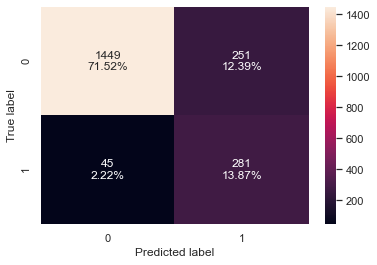

<IPython.core.display.Javascript object>

In [93]:
confusion_matrix_sklearn(lr_un, X_val, y_val)

## RandomizedSearchCV

In [94]:
%%time

# Parameter grid to pass in GridSearchCV

parameters = {'C' : np.arange(0.1,1.1,0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=lr_un, param_distributions=parameters, n_jobs=-1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print('Best parameters are {} with CV score : {} '.format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'C': 0.1} with CV score : 0.8545107273678703 
Wall time: 3.79 s


<IPython.core.display.Javascript object>

In [95]:
# Building model with best parameters

lr_un_tuned = LogisticRegression(random_state=1, C=0.1, solver="newton-cg")

# Fit the model on training data
lr_un_tuned.fit(X_train_un, y_train_un)

LogisticRegression(C=0.1, random_state=1, solver='newton-cg')

<IPython.core.display.Javascript object>

### Model Performance

In [96]:
# Calculating the metrics on train set

lr_random_train = model_performance_classification_sklearn(
    lr_un_tuned, X_train_un, y_train_un
)
print("Training performance :")
lr_random_train

Training performance :


Accuracy  Recall  Precision    F1
0     0.845   0.859      0.836 0.847

<IPython.core.display.Javascript object>

In [97]:
# Calculating the metrics on validation set

lr_random_val = model_performance_classification_sklearn(lr_un_tuned, X_val, y_val)
print("Training performance :")
lr_random_val

Training performance :


Accuracy  Recall  Precision    F1
0     0.846   0.877      0.513 0.647

<IPython.core.display.Javascript object>

- The recall is good on the validation set but the precision is pretty low

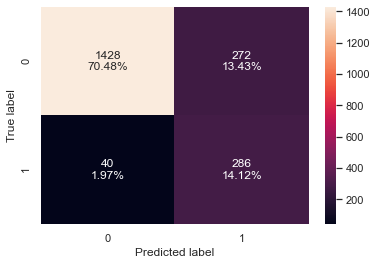

<IPython.core.display.Javascript object>

In [98]:
confusion_matrix_sklearn(lr_un_tuned, X_val, y_val)

## 2. AdaBoost Classifier on Undersampled data

In [99]:
# Building the model
abc_un = AdaBoostClassifier(random_state=1)
abc_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [100]:
# Model performance with default parameters

abc_un_train_perf = model_performance_classification_sklearn(
    abc_un, X_train_un, y_train_un
)
print("Training performance :")
abc_un_train_perf

Training performance :


Accuracy  Recall  Precision    F1
0     0.946   0.952      0.941 0.947

<IPython.core.display.Javascript object>

In [101]:
abc_un_val_perf = model_performance_classification_sklearn(abc_un, X_val, y_val)
print("Validation performance :")
abc_un_val_perf

Validation performance :


Accuracy  Recall  Precision    F1
0     0.923   0.939      0.692 0.797

<IPython.core.display.Javascript object>

- Really good recall score and better precision compared to the previous tuned model. However, the model seems to be slightly overfit. Let's check if overfitting be overcome after hypertuning the model

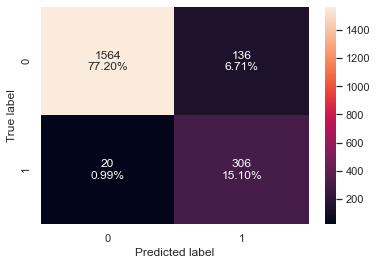

<IPython.core.display.Javascript object>

In [102]:
confusion_matrix_sklearn(abc_un, X_val, y_val)

## RandomizedSearchCV

In [103]:
%%time

# Parameter grid to pass in GridSearchCV

param_grid = {'n_estimators':np.arange(10,110,10),
             'learning_rate':[0.1,0.01,0.2,0.05,1],
             'base_estimator':[DecisionTreeClassifier(max_depth=1,random_state=1),
                              DecisionTreeClassifier(max_depth=2,random_state=1),
                              DecisionTreeClassifier(max_depth=3,random_state=1),
                             ]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator = abc_un, param_distributions=param_grid, n_jobs=-1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print('Best parameters are {} with CV score : {} '.format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score : 0.9467346938775509 
Wall time: 10.3 s


<IPython.core.display.Javascript object>

In [104]:
# Building model with best parameters

abc_un_tuned = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
    random_state=1,
)

# Fit the model on training data
abc_un_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

### Model Performance

In [105]:
# Calculating the metrics on train set

abc_random_train = model_performance_classification_sklearn(
    abc_un_tuned, X_train_un, y_train_un
)
print("Training performance :")
abc_random_train

Training performance :


Accuracy  Recall  Precision    F1
0     0.986   0.992      0.980 0.986

<IPython.core.display.Javascript object>

In [106]:
# Calculating the metrics on validation set

abc_random_val = model_performance_classification_sklearn(abc_un_tuned, X_val, y_val)
print("Validation performance :")
abc_random_val

Validation performance :


Accuracy  Recall  Precision    F1
0     0.936   0.969      0.725 0.829

<IPython.core.display.Javascript object>

- The scores have improved after tuning the model. The scores on the validation set fulfills our requirement. Must tune the other two models to check for their performance before deciding on the best model

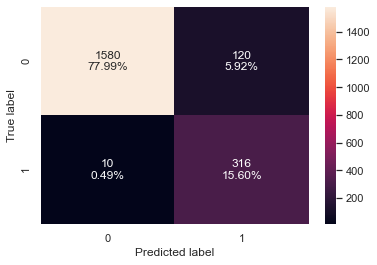

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn(abc_un_tuned, X_val, y_val)

## 3. Gradient Boosting Classifier on Undersampled data

In [108]:
# Building the model
gbc_un = GradientBoostingClassifier(random_state=1)
gbc_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [109]:
# Model performance with default parameters

gbc_un_train_perf = model_performance_classification_sklearn(
    gbc_un, X_train_un, y_train_un
)
print("Training performance :")
gbc_un_train_perf

Training performance :


Accuracy  Recall  Precision    F1
0     0.972   0.981      0.964 0.972

<IPython.core.display.Javascript object>

In [110]:
gbc_un_val_perf = model_performance_classification_sklearn(gbc_un, X_val, y_val)
print("Validation performance :")
gbc_un_val_perf

Validation performance :


Accuracy  Recall  Precision    F1
0     0.934   0.957      0.724 0.824

<IPython.core.display.Javascript object>

- The scores with default parameters are close to the hypertuned performance given by the above model. Let's hypertune this model to check if the scores can be improved further

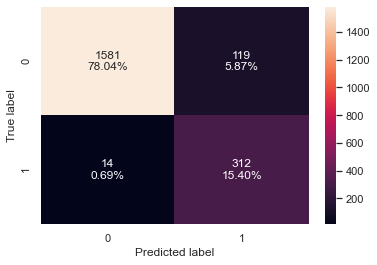

<IPython.core.display.Javascript object>

In [111]:
confusion_matrix_sklearn(gbc_un, X_val, y_val)

## RandomizedSearchCV 

In [112]:
%%time

# Parameter grid to pass in GridSearchCV

param_grid = {'n_estimators' : np.arange(100,260,10),
             'subsample' : np.arange(0.5,1,0.01),
             'max_features' : [0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=gbc_un, param_distributions=param_grid, n_jobs=-1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearcHCV
randomized_cv.fit(X_train_un,y_train_un)

print('Best parameters are {} with CV score : {}'.format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.9600000000000004, 'n_estimators': 160, 'max_features': 0.7} with CV score : 0.9549084249084249
Wall time: 16 s


<IPython.core.display.Javascript object>

In [113]:
# Buiding model with best parameters

gbc_un_tuned = GradientBoostingClassifier(
    n_estimators=160, subsample=0.960, max_features=0.7, random_state=1
)

# Fit the model on training data
gbc_un_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_features=0.7, n_estimators=160, random_state=1,
                           subsample=0.96)

<IPython.core.display.Javascript object>

### Model Performance

In [114]:
# Calculating the metrics on train set

gbc_random_train = model_performance_classification_sklearn(
    gbc_un_tuned, X_train_un, y_train_un
)
print("Training performance :")
gbc_random_train

Training performance :


Accuracy  Recall  Precision    F1
0     0.983   0.989      0.978 0.983

<IPython.core.display.Javascript object>

In [115]:
# Calculating the metrics on validation set

gbc_random_val = model_performance_classification_sklearn(gbc_un_tuned, X_val, y_val)
print("Validation performance :")
gbc_random_val

Validation performance :


Accuracy  Recall  Precision    F1
0     0.947   0.966      0.766 0.855

<IPython.core.display.Javascript object>

- This model is giving the highest validation scores among all the hypertuned model so far. Let's check if hypertuned XGBoost can give even better scores than this.

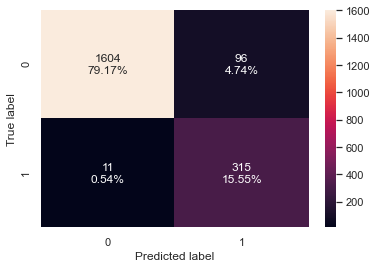

<IPython.core.display.Javascript object>

In [116]:
confusion_matrix_sklearn(gbc_un_tuned, X_val, y_val)

## 4. XGBoost Classifier on Oversampled data

In [117]:
# Building the model
xgb_over = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [118]:
# Model performance with default parameters

xgb_over_train_perf = model_performance_classification_sklearn(
    xgb_over, X_train_over, y_train_over
)
print("Training performance :")
xgb_over_train_perf

Training performance :


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

<IPython.core.display.Javascript object>

In [119]:
xgb_over_val_perf = model_performance_classification_sklearn(xgb_over, X_val, y_val)
print("Validation performance :")
xgb_over_val_perf

Validation performance :


Accuracy  Recall  Precision    F1
0     0.971   0.911      0.908 0.910

<IPython.core.display.Javascript object>

- The XGBoost model with default parameters is overfit on the train set. However, scores on the validation set are the best. Let's hypertune to check if we can find the right fit.

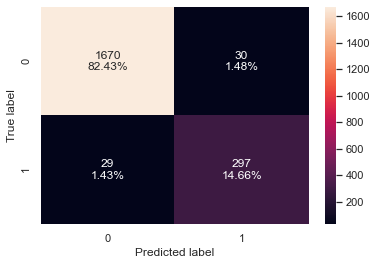

<IPython.core.display.Javascript object>

In [120]:
confusion_matrix_sklearn(xgb_over, X_val, y_val)

## RandomizedSearchCV

In [121]:
%%time

# Parameter grid to pass in GridSearchCV

param_grid = {'n_estimators' : np.arange(50,100,20),
             'scale_pos_weight' : [2,5,7,9,10],
             'learning_rate' : [0.01,0.1,0.2,0.05],
             'gamma' : [0,1,3,5],
             'subsample' : [0.8,0.9,1],
             'colsample_bytree' : [0.5,0.7,0.9,1],
             'colsample_bylevel' : [0.5,0.7,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=xgb_over, param_distributions = param_grid, n_jobs=-1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print('Best parameters are {} with CV score : {}'.format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 90, 'learning_rate': 0.01, 'gamma': 5, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7} with CV score : 0.9964705882352941
Wall time: 52.6 s


<IPython.core.display.Javascript object>

In [122]:
# Building model with best parameters

xgb_over_tuned = XGBClassifier(
    random_state=1,
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=90,
    learning_rate=0.01,
    gamma=5,
    colsample_bytree=0.5,
    colsample_bylevel=0.7,
    eval_metric="logloss",
)

# Fit the model on training data
xgb_over_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

### Model Performance

In [123]:
# Calculating the metrics on train set

xgb_over_random_train = model_performance_classification_sklearn(
    xgb_over_tuned, X_train_over, y_train_over
)
print("Training performance :")
xgb_over_random_train

Training performance :


Accuracy  Recall  Precision    F1
0     0.861   1.000      0.783 0.878

<IPython.core.display.Javascript object>

In [124]:
# Calculating the metrics on validation set

xgb_over_random_val = model_performance_classification_sklearn(
    xgb_over_tuned, X_val, y_val
)
print("Validation performance :")
xgb_over_random_val

Validation performance :


Accuracy  Recall  Precision    F1
0     0.764   0.991      0.404 0.574

<IPython.core.display.Javascript object>

- Recall on the validation set is near perfect however, the precision is pretty bad. May be we can try different combination of parameters to find the right fit.

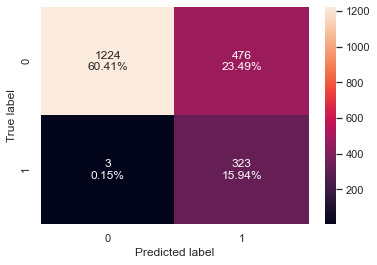

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(xgb_over_tuned, X_val, y_val)

## Hypertuned models performance comparison

In [126]:
# training performance comparison

models_train_comp_df4 = pd.concat(
    [
        lr_random_train.T,
        abc_random_train.T,
        gbc_random_train.T,
        xgb_over_random_train.T,
    ],
    axis=1,
)

models_train_comp_df4.columns = [
    "Logistic Regression on Downsampled data",
    "AdaBoost Classifier on Downsampled data",
    "Gradient Boost Classifier on Downsampled data",
    "XGBoost Classifier on Oversampled data",
]

print("Training performance comparison :")
models_train_comp_df4

Training performance comparison :


Logistic Regression on Downsampled data  \
Accuracy                                     0.845   
Recall                                       0.859   
Precision                                    0.836   
F1                                           0.847   

           AdaBoost Classifier on Downsampled data  \
Accuracy                                     0.986   
Recall                                       0.992   
Precision                                    0.980   
F1                                           0.986   

           Gradient Boost Classifier on Downsampled data  \
Accuracy                                           0.983   
Recall                                             0.989   
Precision                                          0.978   
F1                                                 0.983   

           XGBoost Classifier on Oversampled data  
Accuracy                                    0.861  
Recall                                      1.000  
Precision                                   0.783  
F1                                          0.878

<IPython.core.display.Javascript object>

In [127]:
# validation performance comparison

models_val_comp_df4 = pd.concat(
    [lr_random_val.T, abc_random_val.T, gbc_random_val.T, xgb_over_random_val.T], axis=1
)

models_val_comp_df4.columns = [
    "Logistic Regression on Downsampled data",
    "AdaBoost Classifier on Downsampled data",
    "Gradient Boost Classifier on Downsampled data",
    "XGBoost Classifier on Oversampled data",
]

print("Validation performance comparison :")
models_val_comp_df4

Validation performance comparison :


Logistic Regression on Downsampled data  \
Accuracy                                     0.846   
Recall                                       0.877   
Precision                                    0.513   
F1                                           0.647   

           AdaBoost Classifier on Downsampled data  \
Accuracy                                     0.936   
Recall                                       0.969   
Precision                                    0.725   
F1                                           0.829   

           Gradient Boost Classifier on Downsampled data  \
Accuracy                                           0.947   
Recall                                             0.966   
Precision                                          0.766   
F1                                                 0.855   

           XGBoost Classifier on Oversampled data  
Accuracy                                    0.764  
Recall                                      0.991  
Precision                                   0.404  
F1                                          0.574

<IPython.core.display.Javascript object>

### Conclusion :

- **Logistic Regression** is giving a generalized performance on the validation set. However, the scores does not meet the problem requirement 
- **XGBoost** gives a near perfect recall on the validation set. However, the precision score is too low and it does not meet the problem requirement
- **AdaBoost and Gradient Boost** models are both giving the best scores fulfilling the problem requirement.


- However, I choose **Gradient Boosting Classifier on Downsampled data** as my best model as the accuracy, precision and F1 scores are a little over the edge in comparison to the hypertuned AdaBoost model while the recalls are equal

# Performance of the best model on test set

In [128]:
gbc_random_test = model_performance_classification_sklearn(gbc_un_tuned, X_test, y_test)
print("Test performance :")
gbc_random_test

Test performance :


Accuracy  Recall  Precision    F1
0     0.940   0.975      0.737 0.840

<IPython.core.display.Javascript object>

- The model is giving a generalized performance on validation and test sets while fulfilling our requirements

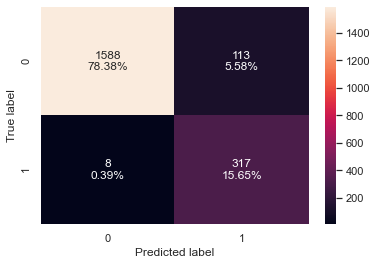

<IPython.core.display.Javascript object>

In [129]:
confusion_matrix_sklearn(gbc_un_tuned, X_test, y_test)

## Feature Importances

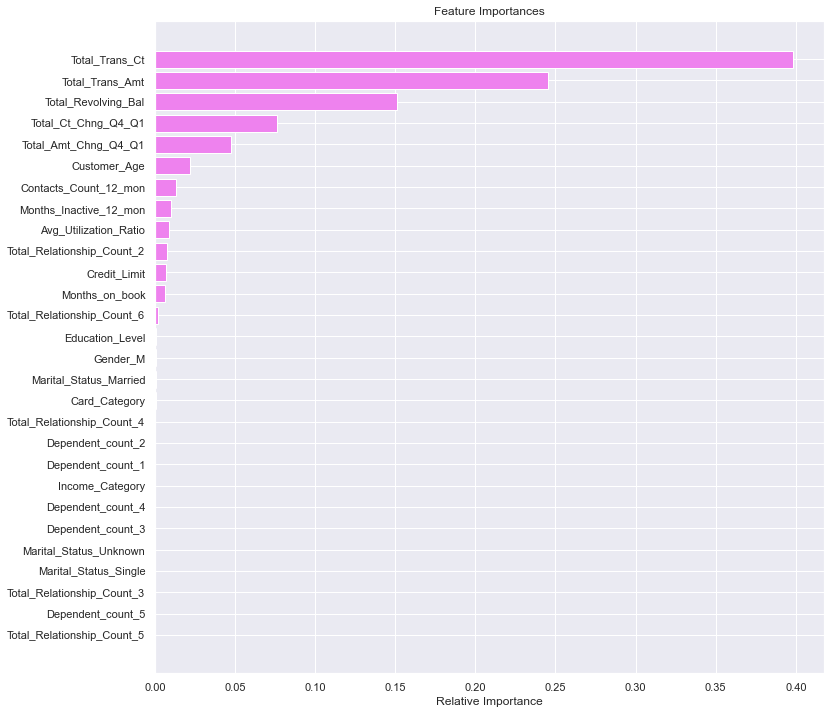

<IPython.core.display.Javascript object>

In [130]:
feature_names = X_train_un.columns
importances = gbc_un_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Ct is the most important feature followed by Total_Trans_Amt and Total_Revolving_Bal
- It is to be noted that the customer's personal information like the education level, marital status, dependents count and even the income category are given little to importance, except for the customer's age
- All the important features are based on the transactions made by the customer and their relationship with the bank

# Productionizing the model

## Column Transformer

In [131]:
# Creating a list of categorical variables
categorical_features = [
    "Education_Level",
    "Card_Category",
    "Income_Category",
    "Gender",
    "Dependent_count",
    "Marital_Status",
    "Total_Relationship_Count",
]

# Creating a transformer for categorical variables
categorical_transformer = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
        ("ordinal", OrdinalEncoder()),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# handle_unknown = 'ignore' allows model to handle any unknown category in the test data

# Creating a column transformer
preprocessor = ColumnTransformer(
    [("cat", categorical_transformer, categorical_features)], remainder="passthrough"
)

# remainder='passthrough' will allow other variables from the original data to pass through but not the variables
# in the categorical columns without any changes

<IPython.core.display.Javascript object>

In [132]:
# Separating the dependent and independent variables

X = data.drop("Attrition_Flag", axis=1)
y = data["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [133]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 18) (3039, 18)


<IPython.core.display.Javascript object>

## Model Pipeline

In [134]:
# Creating new pipeline with best parameters

model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBC",
            GradientBoostingClassifier(
                n_estimators=160, subsample=0.960, max_features=0.7, random_state=1,
            ),
        ),
    ]
)

# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education_Level',
                                                   'Card_Category',
                                                   'Income_Category', 'Gender',
     

<IPython.core.display.Javascript object>

# Business Insights and Recommendations

- Potential customers are likely :
    - customers who have been inactive for longer periods
    - who do not have any revolving balance left
    - having 1K or less balance amount left on their credit card
    - who do not utilize the credit available on their card
    - who have had high number of contacts with the bank in the last 12 months
    - customers with lower transation amount / count in the past 12 months
    - customers with lower total transaction amount / count change ratio of 4th and 1st quarters
    
    
- The bank can :
    - provide deals like cash back or 0% interest over a period of time, so that the customers are likely to become more active
    - promote their products with attractive offers as customers holding more number of products with the bank show lower attrition rate
    - resolve any customer issues so as to reduce the number of contacts with the bank
    - provide less interest rates on cash transfers with credit cards
    - provide rewards for online shopping over a fixed amount
    - provide introductory offers to attract new customers 
    - constantly update the marketing strategies based on the customers' interest and competitive bank offers